# 업종별 분석

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats

In [2]:
import os
os.name

if os.name == 'posix': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')

In [3]:
# Load Data

file = "/Users/ChaeEun/Desktop/프로젝트/bcdata.csv"

# Read Data

data = pd.read_csv(file)

## 업종별 매출 합계

In [4]:
# 업종과 년월별 매출 그룹화

business = data.groupby(by = ["STD_CLSS_NM", "REG_YYMM"])

# 업종별 매출 합계

businessAMT = business['AMT'].sum()

STD_CLSS_NM  REG_YYMM
건강보조식품 소매업   201901      8605074944
             201902      7695979668
             201903      6307887107
             201904      6189621059
             201905      7930621122
                            ...    
휴양콘도 운영업     201912      5293795864
             202001      8873863619
             202002      3317926290
             202003      1093634463
             202004      1113257395
Name: AMT, Length: 656, dtype: int64


## 건강보조식품 소매업

Text(0.5, 1.0, '건강보조식품 소매업 카드매출 추이')

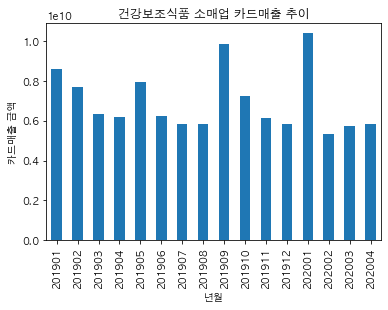

In [7]:
# 업종별 데이터 추출

businessTypeAMT = businessAMT['건강보조식품 소매업']

# 카드매출 시각화

businessTypeAMT.plot.bar()
plt.xlabel('년월')
plt.ylabel('카드매출 금액')
plt.title('건강보조식품 소매업 카드매출 추이')

In [8]:
# 코로나 전후 비교 (2019년 1월~4월, 2020년 1월~4월)

# 2019년 1월~4월, 2020년 1월~4월 이용금액 합 데이터 추출

businessTypeAMT2019 = businessTypeAMT.loc['201901': '201904']
businessTypeAMT2020 = businessTypeAMT.loc['202001': '202004']

# 2019년 2월~4월, 2020년 2월~4월 이용건수 합 데이터 추출

businessTypeAMT2019_2 = businessTypeAMT.loc['201902': '201904']
businessTypeAMT2020_2 = businessTypeAMT.loc['202002': '202004']

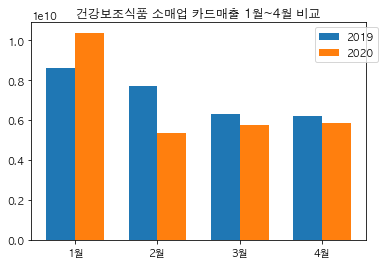

2019년 1월~4월과 2020년 1월~4월 카드매출 t-statistics 값은 0.281 이며, p-value는 0.788 입니다.
2019년 2월~4월과 2020년 2월~4월 카드매출 t-statistics 값은 2.146 이며, p-value는 0.098 입니다.
2019년 2월~4월에 비해 2020년 2월~4월 카드매출은 16.17%가 하락하였습니다.


In [9]:
# 2019년 1월~4월, 2020년 1월~4월 이용금액 비교 시각화

fig, ax = plt.subplots()

N = 4
ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, businessTypeAMT2019, width)

p2 = ax.bar(ind + width, businessTypeAMT2020, width)

ax.set_title('건강보조식품 소매업 카드매출 1월~4월 비교')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('1월', '2월', '3월', '4월'))

ax.legend((p1[0], p2[0]), ('2019', '2020'), bbox_to_anchor=(1.05, 1))

plt.show()

# 이용금액 Sample T-test 실행

# 2019년 1월~4월, 2020년 1월~4월 이용금액 T-test
businessAMTttest = stats.ttest_ind(businessTypeAMT2019.values, businessTypeAMT2020.values)

print("2019년 1월~4월과 2020년 1월~4월 카드매출 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %businessAMTttest)

# 2019년 2월~4월, 2020년 2월~4월 이용금액 T-test
businessAMTttest_2 = stats.ttest_ind(businessTypeAMT2019_2.values, businessTypeAMT2020_2.values)

print("2019년 2월~4월과 2020년 2월~4월 카드매출 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %businessAMTttest_2)

# 매출 하락 %

AMT2019sum = sum(businessTypeAMT2019_2.values)
AMT2020sum = sum(businessTypeAMT2020_2.values)

AMTpercentage = (AMT2019sum - AMT2020sum) / AMT2019sum * 100
print("2019년 2월~4월에 비해 2020년 2월~4월 카드매출은 %.2f%%가 하락하였습니다." %AMTpercentage)

## 골프장 운영업

Text(0.5, 1.0, '골프장 운영업 카드매출 추이')

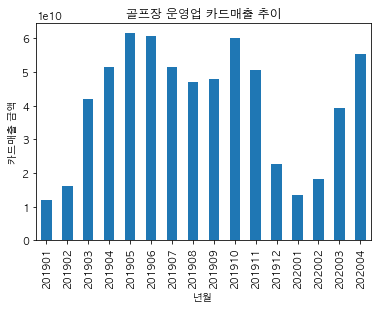

In [10]:
# 업종별 데이터 추출

businessTypeAMT = businessAMT['골프장 운영업']

# 카드매출 시각화

businessTypeAMT.plot.bar()
plt.xlabel('년월')
plt.ylabel('카드매출 금액')
plt.title('골프장 운영업 카드매출 추이')


In [11]:
# 코로나 전후 비교 (2019년 1월~4월, 2020년 1월~4월)

# 2019년 1월~4월, 2020년 1월~4월 이용금액 합 데이터 추출

businessTypeAMT2019 = businessTypeAMT.loc['201901': '201904']
businessTypeAMT2020 = businessTypeAMT.loc['202001': '202004']

# 2019년 2월~4월, 2020년 2월~4월 이용건수 합 데이터 추출

businessTypeAMT2019_2 = businessTypeAMT.loc['201902': '201904']
businessTypeAMT2020_2 = businessTypeAMT.loc['202002': '202004']


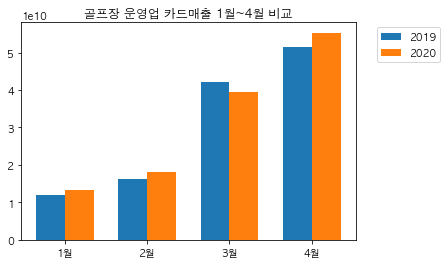

2019년 1월~4월과 2020년 1월~4월 카드매출 t-statistics 값은 -0.082 이며, p-value는 0.937 입니다.
2019년 2월~4월과 2020년 2월~4월 카드매출 t-statistics 값은 -0.068 이며, p-value는 0.949 입니다.
2019년 2월~4월에 비해 2020년 2월~4월 카드매출은 -2.79%가 하락하였습니다.


In [12]:
# 2019년 1월~4월, 2020년 1월~4월 이용금액 비교 시각화

fig, ax = plt.subplots()

N = 4
ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, businessTypeAMT2019, width)

p2 = ax.bar(ind + width, businessTypeAMT2020, width)

ax.set_title('골프장 운영업 카드매출 1월~4월 비교')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('1월', '2월', '3월', '4월'))

ax.legend((p1[0], p2[0]), ('2019', '2020'), bbox_to_anchor=(1.05, 1))

plt.show()

# 이용금액 Sample T-test 실행

# 2019년 1월~4월, 2020년 1월~4월 이용금액 T-test
businessAMTttest = stats.ttest_ind(businessTypeAMT2019.values, businessTypeAMT2020.values)

print("2019년 1월~4월과 2020년 1월~4월 카드매출 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %businessAMTttest)

# 2019년 2월~4월, 2020년 2월~4월 이용금액 T-test
businessAMTttest_2 = stats.ttest_ind(businessTypeAMT2019_2.values, businessTypeAMT2020_2.values)

print("2019년 2월~4월과 2020년 2월~4월 카드매출 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %businessAMTttest_2)

# 매출 하락 %

AMT2019sum = sum(businessTypeAMT2019_2.values)
AMT2020sum = sum(businessTypeAMT2020_2.values)

AMTpercentage = (AMT2019sum - AMT2020sum) / AMT2019sum * 100
print("2019년 2월~4월에 비해 2020년 2월~4월 카드매출은 %.2f%%가 하락하였습니다." %AMTpercentage)


## 과실 및 채소 소매업

Text(0.5, 1.0, '과실 및 채소 소매업 카드매출 추이')

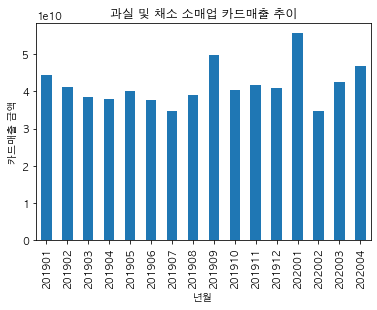

In [13]:
# 업종별 데이터 추출

businessTypeAMT = businessAMT['과실 및 채소 소매업']

# 카드매출 시각화

businessTypeAMT.plot.bar()
plt.xlabel('년월')
plt.ylabel('카드매출 금액')
plt.title('과실 및 채소 소매업 카드매출 추이')


In [14]:
# 코로나 전후 비교 (2019년 1월~4월, 2020년 1월~4월)

# 2019년 1월~4월, 2020년 1월~4월 이용금액 합 데이터 추출

businessTypeAMT2019 = businessTypeAMT.loc['201901': '201904']
businessTypeAMT2020 = businessTypeAMT.loc['202001': '202004']

# 2019년 2월~4월, 2020년 2월~4월 이용건수 합 데이터 추출

businessTypeAMT2019_2 = businessTypeAMT.loc['201902': '201904']
businessTypeAMT2020_2 = businessTypeAMT.loc['202002': '202004']


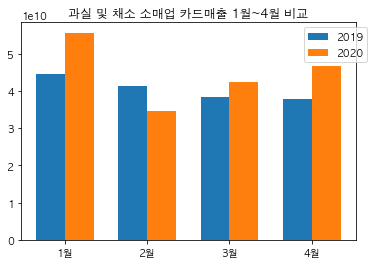

2019년 1월~4월과 2020년 1월~4월 카드매출 t-statistics 값은 -0.951 이며, p-value는 0.378 입니다.
2019년 2월~4월과 2020년 2월~4월 카드매출 t-statistics 값은 -0.579 이며, p-value는 0.594 입니다.
2019년 2월~4월에 비해 2020년 2월~4월 카드매출은 -5.41%가 하락하였습니다.


In [15]:
# 2019년 1월~4월, 2020년 1월~4월 이용금액 비교 시각화

fig, ax = plt.subplots()

N = 4
ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, businessTypeAMT2019, width)

p2 = ax.bar(ind + width, businessTypeAMT2020, width)

ax.set_title('과실 및 채소 소매업 카드매출 1월~4월 비교')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('1월', '2월', '3월', '4월'))

ax.legend((p1[0], p2[0]), ('2019', '2020'), bbox_to_anchor=(1.05, 1))

plt.show()

# 이용금액 Sample T-test 실행

# 2019년 1월~4월, 2020년 1월~4월 이용금액 T-test
businessAMTttest = stats.ttest_ind(businessTypeAMT2019.values, businessTypeAMT2020.values)

print("2019년 1월~4월과 2020년 1월~4월 카드매출 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %businessAMTttest)

# 2019년 2월~4월, 2020년 2월~4월 이용금액 T-test
businessAMTttest_2 = stats.ttest_ind(businessTypeAMT2019_2.values, businessTypeAMT2020_2.values)

print("2019년 2월~4월과 2020년 2월~4월 카드매출 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %businessAMTttest_2)

# 매출 하락 %

AMT2019sum = sum(businessTypeAMT2019_2.values)
AMT2020sum = sum(businessTypeAMT2020_2.values)

AMTpercentage = (AMT2019sum - AMT2020sum) / AMT2019sum * 100
print("2019년 2월~4월에 비해 2020년 2월~4월 카드매출은 %.2f%%가 하락하였습니다." %AMTpercentage)


## 관광 민예품 및 선물용품 소매업

Text(0.5, 1.0, '관광 민예품 및 선물용품 소매업카드매출 추이')

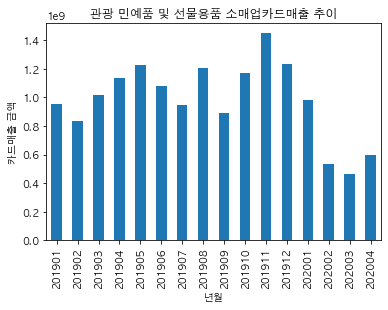

In [16]:
# 업종별 데이터 추출

businessTypeAMT = businessAMT['관광 민예품 및 선물용품 소매업']

# 카드매출 시각화

businessTypeAMT.plot.bar()
plt.xlabel('년월')
plt.ylabel('카드매출 금액')
plt.title('관광 민예품 및 선물용품 소매업카드매출 추이')


In [17]:
# 코로나 전후 비교 (2019년 1월~4월, 2020년 1월~4월)

# 2019년 1월~4월, 2020년 1월~4월 이용금액 합 데이터 추출

businessTypeAMT2019 = businessTypeAMT.loc['201901': '201904']
businessTypeAMT2020 = businessTypeAMT.loc['202001': '202004']

# 2019년 2월~4월, 2020년 2월~4월 이용건수 합 데이터 추출

businessTypeAMT2019_2 = businessTypeAMT.loc['201902': '201904']
businessTypeAMT2020_2 = businessTypeAMT.loc['202002': '202004']


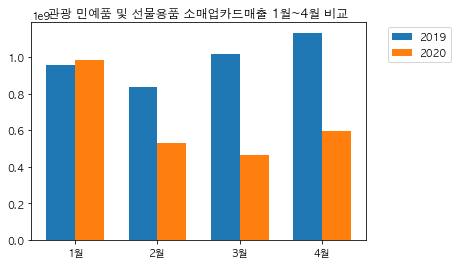

2019년 1월~4월과 2020년 1월~4월 카드매출 t-statistics 값은 2.605 이며, p-value는 0.040 입니다.
2019년 2월~4월과 2020년 2월~4월 카드매출 t-statistics 값은 4.928 이며, p-value는 0.008 입니다.
2019년 2월~4월에 비해 2020년 2월~4월 카드매출은 46.73%가 하락하였습니다.


In [18]:
# 2019년 1월~4월, 2020년 1월~4월 이용금액 비교 시각화

fig, ax = plt.subplots()

N = 4
ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, businessTypeAMT2019, width)

p2 = ax.bar(ind + width, businessTypeAMT2020, width)

ax.set_title('관광 민예품 및 선물용품 소매업 카드매출 1월~4월 비교')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('1월', '2월', '3월', '4월'))

ax.legend((p1[0], p2[0]), ('2019', '2020'), bbox_to_anchor=(1.05, 1))

plt.show()

# 이용금액 Sample T-test 실행

# 2019년 1월~4월, 2020년 1월~4월 이용금액 T-test
businessAMTttest = stats.ttest_ind(businessTypeAMT2019.values, businessTypeAMT2020.values)

print("2019년 1월~4월과 2020년 1월~4월 카드매출 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %businessAMTttest)

# 2019년 2월~4월, 2020년 2월~4월 이용금액 T-test
businessAMTttest_2 = stats.ttest_ind(businessTypeAMT2019_2.values, businessTypeAMT2020_2.values)

print("2019년 2월~4월과 2020년 2월~4월 카드매출 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %businessAMTttest_2)

# 매출 하락 %

AMT2019sum = sum(businessTypeAMT2019_2.values)
AMT2020sum = sum(businessTypeAMT2020_2.values)

AMTpercentage = (AMT2019sum - AMT2020sum) / AMT2019sum * 100
print("2019년 2월~4월에 비해 2020년 2월~4월 카드매출은 %.2f%%가 하락하였습니다." %AMTpercentage)


## 그외 기타 분류안된 오락관련 서비스업

Text(0.5, 1.0, '그외 기타 분류안된 오락관련 서비스업카드매출 추이')

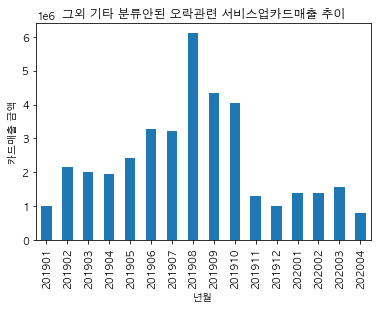

In [19]:
# 업종별 데이터 추출

businessTypeAMT = businessAMT['그외 기타 분류안된 오락관련 서비스업']

# 카드매출 시각화

businessTypeAMT.plot.bar()
plt.xlabel('년월')
plt.ylabel('카드매출 금액')
plt.title('그외 기타 분류안된 오락관련 서비스업카드매출 추이')


In [20]:
# 코로나 전후 비교 (2019년 1월~4월, 2020년 1월~4월)

# 2019년 1월~4월, 2020년 1월~4월 이용금액 합 데이터 추출

businessTypeAMT2019 = businessTypeAMT.loc['201901': '201904']
businessTypeAMT2020 = businessTypeAMT.loc['202001': '202004']

# 2019년 2월~4월, 2020년 2월~4월 이용건수 합 데이터 추출

businessTypeAMT2019_2 = businessTypeAMT.loc['201902': '201904']
businessTypeAMT2020_2 = businessTypeAMT.loc['202002': '202004']


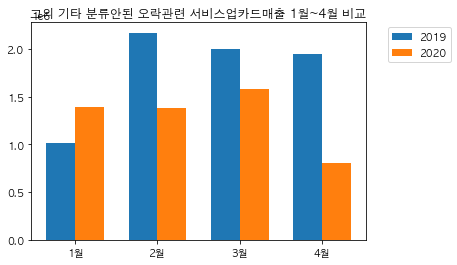

2019년 1월~4월과 2020년 1월~4월 카드매출 t-statistics 값은 1.602 이며, p-value는 0.160 입니다.
2019년 2월~4월과 2020년 2월~4월 카드매출 t-statistics 값은 3.259 이며, p-value는 0.031 입니다.
2019년 2월~4월에 비해 2020년 2월~4월 카드매출은 38.43%가 하락하였습니다.


In [21]:
# 2019년 1월~4월, 2020년 1월~4월 이용금액 비교 시각화

fig, ax = plt.subplots()

N = 4
ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, businessTypeAMT2019, width)

p2 = ax.bar(ind + width, businessTypeAMT2020, width)

ax.set_title('그외 기타 분류안된 오락관련 서비스업 카드매출 1월~4월 비교')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('1월', '2월', '3월', '4월'))

ax.legend((p1[0], p2[0]), ('2019', '2020'), bbox_to_anchor=(1.05, 1))

plt.show()

# 이용금액 Sample T-test 실행

# 2019년 1월~4월, 2020년 1월~4월 이용금액 T-test
businessAMTttest = stats.ttest_ind(businessTypeAMT2019.values, businessTypeAMT2020.values)

print("2019년 1월~4월과 2020년 1월~4월 카드매출 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %businessAMTttest)

# 2019년 2월~4월, 2020년 2월~4월 이용금액 T-test
businessAMTttest_2 = stats.ttest_ind(businessTypeAMT2019_2.values, businessTypeAMT2020_2.values)

print("2019년 2월~4월과 2020년 2월~4월 카드매출 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %businessAMTttest_2)

# 매출 하락 %

AMT2019sum = sum(businessTypeAMT2019_2.values)
AMT2020sum = sum(businessTypeAMT2020_2.values)

AMTpercentage = (AMT2019sum - AMT2020sum) / AMT2019sum * 100
print("2019년 2월~4월에 비해 2020년 2월~4월 카드매출은 %.2f%%가 하락하였습니다." %AMTpercentage)


## 그외 기타 스포츠시설 운영업

Text(0.5, 1.0, '그외 기타 스포츠시설 운영업카드매출 추이')

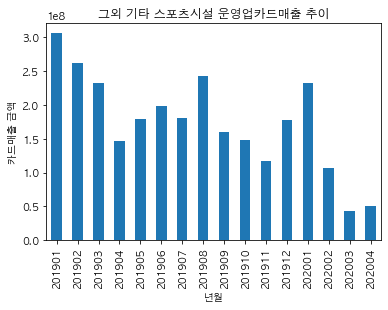

In [22]:
# 업종별 데이터 추출

businessTypeAMT = businessAMT['그외 기타 스포츠시설 운영업']

# 카드매출 시각화

businessTypeAMT.plot.bar()
plt.xlabel('년월')
plt.ylabel('카드매출 금액')
plt.title('그외 기타 스포츠시설 운영업카드매출 추이')


In [23]:
# 코로나 전후 비교 (2019년 1월~4월, 2020년 1월~4월)

# 2019년 1월~4월, 2020년 1월~4월 이용금액 합 데이터 추출

businessTypeAMT2019 = businessTypeAMT.loc['201901': '201904']
businessTypeAMT2020 = businessTypeAMT.loc['202001': '202004']

# 2019년 2월~4월, 2020년 2월~4월 이용건수 합 데이터 추출

businessTypeAMT2019_2 = businessTypeAMT.loc['201902': '201904']
businessTypeAMT2020_2 = businessTypeAMT.loc['202002': '202004']


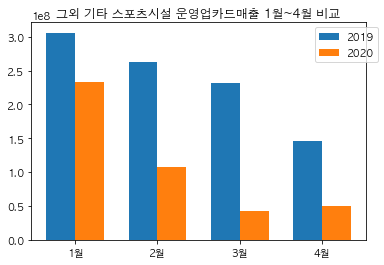

2019년 1월~4월과 2020년 1월~4월 카드매출 t-statistics 값은 2.318 이며, p-value는 0.060 입니다.
2019년 2월~4월과 2020년 2월~4월 카드매출 t-statistics 값은 3.647 이며, p-value는 0.022 입니다.
2019년 2월~4월에 비해 2020년 2월~4월 카드매출은 68.76%가 하락하였습니다.


In [24]:
# 2019년 1월~4월, 2020년 1월~4월 이용금액 비교 시각화

fig, ax = plt.subplots()

N = 4
ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, businessTypeAMT2019, width)

p2 = ax.bar(ind + width, businessTypeAMT2020, width)

ax.set_title('그외 기타 스포츠시설 운영업 카드매출 1월~4월 비교')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('1월', '2월', '3월', '4월'))

ax.legend((p1[0], p2[0]), ('2019', '2020'), bbox_to_anchor=(1.05, 1))

plt.show()

# 이용금액 Sample T-test 실행

# 2019년 1월~4월, 2020년 1월~4월 이용금액 T-test
businessAMTttest = stats.ttest_ind(businessTypeAMT2019.values, businessTypeAMT2020.values)

print("2019년 1월~4월과 2020년 1월~4월 카드매출 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %businessAMTttest)

# 2019년 2월~4월, 2020년 2월~4월 이용금액 T-test
businessAMTttest_2 = stats.ttest_ind(businessTypeAMT2019_2.values, businessTypeAMT2020_2.values)

print("2019년 2월~4월과 2020년 2월~4월 카드매출 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %businessAMTttest_2)

# 매출 하락 %

AMT2019sum = sum(businessTypeAMT2019_2.values)
AMT2020sum = sum(businessTypeAMT2020_2.values)

AMTpercentage = (AMT2019sum - AMT2020sum) / AMT2019sum * 100
print("2019년 2월~4월에 비해 2020년 2월~4월 카드매출은 %.2f%%가 하락하였습니다." %AMTpercentage)


## 그외 기타 종합 소매업

Text(0.5, 1.0, '그외 기타 종합 소매업카드매출 추이')

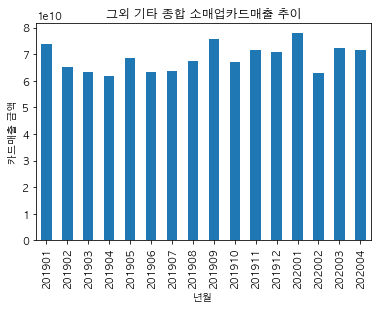

In [25]:
# 업종별 데이터 추출

businessTypeAMT = businessAMT['그외 기타 종합 소매업']

# 카드매출 시각화

businessTypeAMT.plot.bar()
plt.xlabel('년월')
plt.ylabel('카드매출 금액')
plt.title('그외 기타 종합 소매업카드매출 추이')


In [26]:
# 코로나 전후 비교 (2019년 1월~4월, 2020년 1월~4월)

# 2019년 1월~4월, 2020년 1월~4월 이용금액 합 데이터 추출

businessTypeAMT2019 = businessTypeAMT.loc['201901': '201904']
businessTypeAMT2020 = businessTypeAMT.loc['202001': '202004']

# 2019년 2월~4월, 2020년 2월~4월 이용건수 합 데이터 추출

businessTypeAMT2019_2 = businessTypeAMT.loc['201902': '201904']
businessTypeAMT2020_2 = businessTypeAMT.loc['202002': '202004']


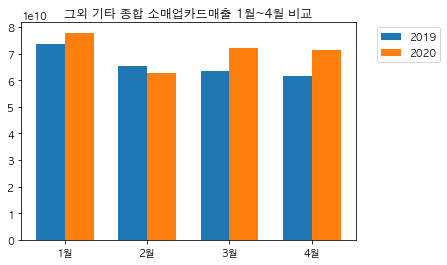

2019년 1월~4월과 2020년 1월~4월 카드매출 t-statistics 값은 -1.247 이며, p-value는 0.259 입니다.
2019년 2월~4월과 2020년 2월~4월 카드매출 t-statistics 값은 -1.707 이며, p-value는 0.163 입니다.
2019년 2월~4월에 비해 2020년 2월~4월 카드매출은 -8.60%가 하락하였습니다.


In [27]:
# 2019년 1월~4월, 2020년 1월~4월 이용금액 비교 시각화

fig, ax = plt.subplots()

N = 4
ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, businessTypeAMT2019, width)

p2 = ax.bar(ind + width, businessTypeAMT2020, width)

ax.set_title('그외 기타 종합 소매업 카드매출 1월~4월 비교')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('1월', '2월', '3월', '4월'))

ax.legend((p1[0], p2[0]), ('2019', '2020'), bbox_to_anchor=(1.05, 1))

plt.show()

# 이용금액 Sample T-test 실행

# 2019년 1월~4월, 2020년 1월~4월 이용금액 T-test
businessAMTttest = stats.ttest_ind(businessTypeAMT2019.values, businessTypeAMT2020.values)

print("2019년 1월~4월과 2020년 1월~4월 카드매출 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %businessAMTttest)

# 2019년 2월~4월, 2020년 2월~4월 이용금액 T-test
businessAMTttest_2 = stats.ttest_ind(businessTypeAMT2019_2.values, businessTypeAMT2020_2.values)

print("2019년 2월~4월과 2020년 2월~4월 카드매출 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %businessAMTttest_2)

# 매출 하락 %

AMT2019sum = sum(businessTypeAMT2019_2.values)
AMT2020sum = sum(businessTypeAMT2020_2.values)

AMTpercentage = (AMT2019sum - AMT2020sum) / AMT2019sum * 100
print("2019년 2월~4월에 비해 2020년 2월~4월 카드매출은 %.2f%%가 하락하였습니다." %AMTpercentage)


## 기타 수상오락 서비스업

Text(0.5, 1.0, '기타 수상오락 서비스업카드매출 추이')

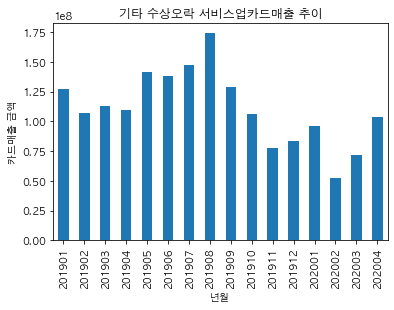

In [28]:
# 업종별 데이터 추출

businessTypeAMT = businessAMT['기타 수상오락 서비스업']

# 카드매출 시각화

businessTypeAMT.plot.bar()
plt.xlabel('년월')
plt.ylabel('카드매출 금액')
plt.title('기타 수상오락 서비스업카드매출 추이')


In [29]:
# 코로나 전후 비교 (2019년 1월~4월, 2020년 1월~4월)

# 2019년 1월~4월, 2020년 1월~4월 이용금액 합 데이터 추출

businessTypeAMT2019 = businessTypeAMT.loc['201901': '201904']
businessTypeAMT2020 = businessTypeAMT.loc['202001': '202004']

# 2019년 2월~4월, 2020년 2월~4월 이용건수 합 데이터 추출

businessTypeAMT2019_2 = businessTypeAMT.loc['201902': '201904']
businessTypeAMT2020_2 = businessTypeAMT.loc['202002': '202004']


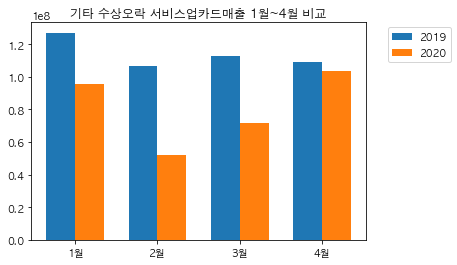

2019년 1월~4월과 2020년 1월~4월 카드매출 t-statistics 값은 2.633 이며, p-value는 0.039 입니다.
2019년 2월~4월과 2020년 2월~4월 카드매출 t-statistics 값은 2.234 이며, p-value는 0.089 입니다.
2019년 2월~4월에 비해 2020년 2월~4월 카드매출은 30.83%가 하락하였습니다.


In [30]:
# 2019년 1월~4월, 2020년 1월~4월 이용금액 비교 시각화

fig, ax = plt.subplots()

N = 4
ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, businessTypeAMT2019, width)

p2 = ax.bar(ind + width, businessTypeAMT2020, width)

ax.set_title('기타 수상오락 서비스업 카드매출 1월~4월 비교')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('1월', '2월', '3월', '4월'))

ax.legend((p1[0], p2[0]), ('2019', '2020'), bbox_to_anchor=(1.05, 1))

plt.show()

# 이용금액 Sample T-test 실행

# 2019년 1월~4월, 2020년 1월~4월 이용금액 T-test
businessAMTttest = stats.ttest_ind(businessTypeAMT2019.values, businessTypeAMT2020.values)

print("2019년 1월~4월과 2020년 1월~4월 카드매출 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %businessAMTttest)

# 2019년 2월~4월, 2020년 2월~4월 이용금액 T-test
businessAMTttest_2 = stats.ttest_ind(businessTypeAMT2019_2.values, businessTypeAMT2020_2.values)

print("2019년 2월~4월과 2020년 2월~4월 카드매출 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %businessAMTttest_2)

# 매출 하락 %

AMT2019sum = sum(businessTypeAMT2019_2.values)
AMT2020sum = sum(businessTypeAMT2020_2.values)

AMTpercentage = (AMT2019sum - AMT2020sum) / AMT2019sum * 100
print("2019년 2월~4월에 비해 2020년 2월~4월 카드매출은 %.2f%%가 하락하였습니다." %AMTpercentage)


## 기타 외국식 음식점업

Text(0.5, 1.0, '기타 외국식 음식점업카드매출 추이')

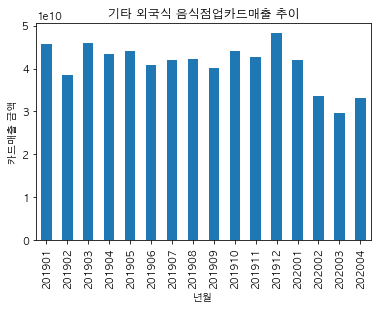

In [31]:
# 업종별 데이터 추출

businessTypeAMT = businessAMT['기타 외국식 음식점업']

# 카드매출 시각화

businessTypeAMT.plot.bar()
plt.xlabel('년월')
plt.ylabel('카드매출 금액')
plt.title('기타 외국식 음식점업카드매출 추이')


In [32]:
# 코로나 전후 비교 (2019년 1월~4월, 2020년 1월~4월)

# 2019년 1월~4월, 2020년 1월~4월 이용금액 합 데이터 추출

businessTypeAMT2019 = businessTypeAMT.loc['201901': '201904']
businessTypeAMT2020 = businessTypeAMT.loc['202001': '202004']

# 2019년 2월~4월, 2020년 2월~4월 이용건수 합 데이터 추출

businessTypeAMT2019_2 = businessTypeAMT.loc['201902': '201904']
businessTypeAMT2020_2 = businessTypeAMT.loc['202002': '202004']


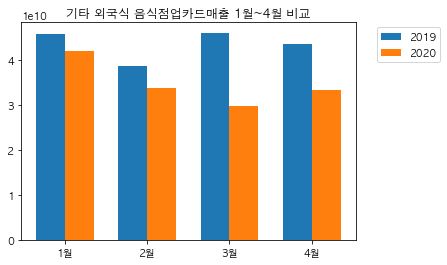

2019년 1월~4월과 2020년 1월~4월 카드매출 t-statistics 값은 2.835 이며, p-value는 0.030 입니다.
2019년 2월~4월과 2020년 2월~4월 카드매출 t-statistics 값은 4.214 이며, p-value는 0.014 입니다.
2019년 2월~4월에 비해 2020년 2월~4월 카드매출은 24.65%가 하락하였습니다.


In [33]:
# 2019년 1월~4월, 2020년 1월~4월 이용금액 비교 시각화

fig, ax = plt.subplots()

N = 4
ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, businessTypeAMT2019, width)

p2 = ax.bar(ind + width, businessTypeAMT2020, width)

ax.set_title('기타 외국식 음식점업 카드매출 1월~4월 비교')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('1월', '2월', '3월', '4월'))

ax.legend((p1[0], p2[0]), ('2019', '2020'), bbox_to_anchor=(1.05, 1))

plt.show()

# 이용금액 Sample T-test 실행

# 2019년 1월~4월, 2020년 1월~4월 이용금액 T-test
businessAMTttest = stats.ttest_ind(businessTypeAMT2019.values, businessTypeAMT2020.values)

print("2019년 1월~4월과 2020년 1월~4월 카드매출 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %businessAMTttest)

# 2019년 2월~4월, 2020년 2월~4월 이용금액 T-test
businessAMTttest_2 = stats.ttest_ind(businessTypeAMT2019_2.values, businessTypeAMT2020_2.values)

print("2019년 2월~4월과 2020년 2월~4월 카드매출 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %businessAMTttest_2)

# 매출 하락 %

AMT2019sum = sum(businessTypeAMT2019_2.values)
AMT2020sum = sum(businessTypeAMT2020_2.values)

AMTpercentage = (AMT2019sum - AMT2020sum) / AMT2019sum * 100
print("2019년 2월~4월에 비해 2020년 2월~4월 카드매출은 %.2f%%가 하락하였습니다." %AMTpercentage)


## 기타 주점업

Text(0.5, 1.0, '기타 주점업카드매출 추이')

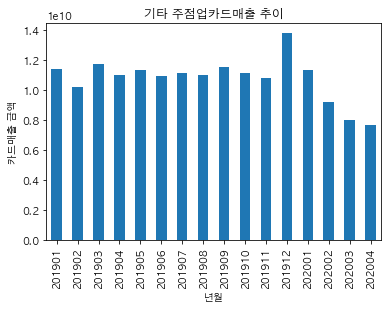

In [34]:
# 업종별 데이터 추출

businessTypeAMT = businessAMT['기타 주점업']

# 카드매출 시각화

businessTypeAMT.plot.bar()
plt.xlabel('년월')
plt.ylabel('카드매출 금액')
plt.title('기타 주점업카드매출 추이')


In [35]:
# 코로나 전후 비교 (2019년 1월~4월, 2020년 1월~4월)

# 2019년 1월~4월, 2020년 1월~4월 이용금액 합 데이터 추출

businessTypeAMT2019 = businessTypeAMT.loc['201901': '201904']
businessTypeAMT2020 = businessTypeAMT.loc['202001': '202004']

# 2019년 2월~4월, 2020년 2월~4월 이용건수 합 데이터 추출

businessTypeAMT2019_2 = businessTypeAMT.loc['201902': '201904']
businessTypeAMT2020_2 = businessTypeAMT.loc['202002': '202004']


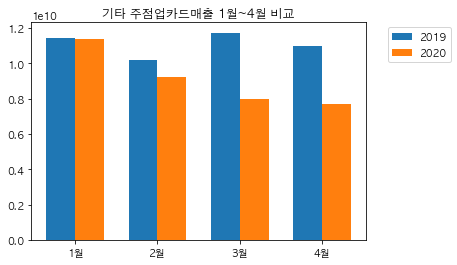

2019년 1월~4월과 2020년 1월~4월 카드매출 t-statistics 값은 2.259 이며, p-value는 0.065 입니다.
2019년 2월~4월과 2020년 2월~4월 카드매출 t-statistics 값은 4.219 이며, p-value는 0.013 입니다.
2019년 2월~4월에 비해 2020년 2월~4월 카드매출은 24.40%가 하락하였습니다.


In [36]:
# 2019년 1월~4월, 2020년 1월~4월 이용금액 비교 시각화

fig, ax = plt.subplots()

N = 4
ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, businessTypeAMT2019, width)

p2 = ax.bar(ind + width, businessTypeAMT2020, width)

ax.set_title('기타 주점업 카드매출 1월~4월 비교')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('1월', '2월', '3월', '4월'))

ax.legend((p1[0], p2[0]), ('2019', '2020'), bbox_to_anchor=(1.05, 1))

plt.show()

# 이용금액 Sample T-test 실행

# 2019년 1월~4월, 2020년 1월~4월 이용금액 T-test
businessAMTttest = stats.ttest_ind(businessTypeAMT2019.values, businessTypeAMT2020.values)

print("2019년 1월~4월과 2020년 1월~4월 카드매출 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %businessAMTttest)

# 2019년 2월~4월, 2020년 2월~4월 이용금액 T-test
businessAMTttest_2 = stats.ttest_ind(businessTypeAMT2019_2.values, businessTypeAMT2020_2.values)

print("2019년 2월~4월과 2020년 2월~4월 카드매출 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %businessAMTttest_2)

# 매출 하락 %

AMT2019sum = sum(businessTypeAMT2019_2.values)
AMT2020sum = sum(businessTypeAMT2020_2.values)

AMTpercentage = (AMT2019sum - AMT2020sum) / AMT2019sum * 100
print("2019년 2월~4월에 비해 2020년 2월~4월 카드매출은 %.2f%%가 하락하였습니다." %AMTpercentage)


## 기타음식료품위주종합소매업

Text(0.5, 1.0, '기타음식료품위주종합소매업카드매출 추이')

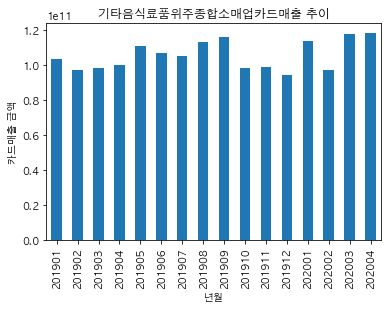

In [37]:
# 업종별 데이터 추출

businessTypeAMT = businessAMT['기타음식료품위주종합소매업']

# 카드매출 시각화

businessTypeAMT.plot.bar()
plt.xlabel('년월')
plt.ylabel('카드매출 금액')
plt.title('기타음식료품위주종합소매업카드매출 추이')


In [38]:
# 코로나 전후 비교 (2019년 1월~4월, 2020년 1월~4월)

# 2019년 1월~4월, 2020년 1월~4월 이용금액 합 데이터 추출

businessTypeAMT2019 = businessTypeAMT.loc['201901': '201904']
businessTypeAMT2020 = businessTypeAMT.loc['202001': '202004']

# 2019년 2월~4월, 2020년 2월~4월 이용건수 합 데이터 추출

businessTypeAMT2019_2 = businessTypeAMT.loc['201902': '201904']
businessTypeAMT2020_2 = businessTypeAMT.loc['202002': '202004']


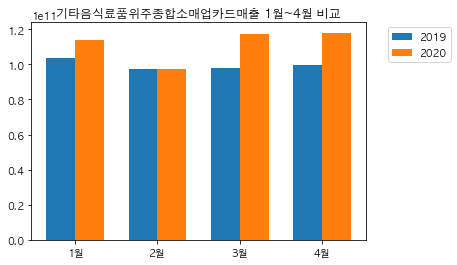

2019년 1월~4월과 2020년 1월~4월 카드매출 t-statistics 값은 -2.351 이며, p-value는 0.057 입니다.
2019년 2월~4월과 2020년 2월~4월 카드매출 t-statistics 값은 -1.824 이며, p-value는 0.142 입니다.
2019년 2월~4월에 비해 2020년 2월~4월 카드매출은 -12.81%가 하락하였습니다.


In [39]:
# 2019년 1월~4월, 2020년 1월~4월 이용금액 비교 시각화

fig, ax = plt.subplots()

N = 4
ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, businessTypeAMT2019, width)

p2 = ax.bar(ind + width, businessTypeAMT2020, width)

ax.set_title('기타음식료품위주종합소매업 카드매출 1월~4월 비교')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('1월', '2월', '3월', '4월'))

ax.legend((p1[0], p2[0]), ('2019', '2020'), bbox_to_anchor=(1.05, 1))

plt.show()

# 이용금액 Sample T-test 실행

# 2019년 1월~4월, 2020년 1월~4월 이용금액 T-test
businessAMTttest = stats.ttest_ind(businessTypeAMT2019.values, businessTypeAMT2020.values)

print("2019년 1월~4월과 2020년 1월~4월 카드매출 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %businessAMTttest)

# 2019년 2월~4월, 2020년 2월~4월 이용금액 T-test
businessAMTttest_2 = stats.ttest_ind(businessTypeAMT2019_2.values, businessTypeAMT2020_2.values)

print("2019년 2월~4월과 2020년 2월~4월 카드매출 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %businessAMTttest_2)

# 매출 하락 %

AMT2019sum = sum(businessTypeAMT2019_2.values)
AMT2020sum = sum(businessTypeAMT2020_2.values)

AMTpercentage = (AMT2019sum - AMT2020sum) / AMT2019sum * 100
print("2019년 2월~4월에 비해 2020년 2월~4월 카드매출은 %.2f%%가 하락하였습니다." %AMTpercentage)


## 내항 여객 운송업

Text(0.5, 1.0, '내항 여객 운송업카드매출 추이')

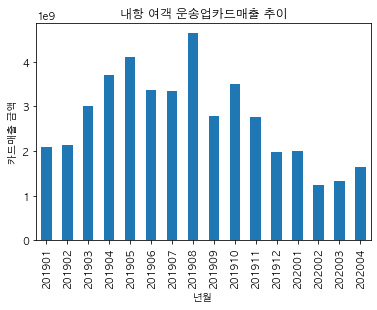

In [40]:
# 업종별 데이터 추출

businessTypeAMT = businessAMT['내항 여객 운송업']

# 카드매출 시각화

businessTypeAMT.plot.bar()
plt.xlabel('년월')
plt.ylabel('카드매출 금액')
plt.title('내항 여객 운송업카드매출 추이')


In [41]:
# 코로나 전후 비교 (2019년 1월~4월, 2020년 1월~4월)

# 2019년 1월~4월, 2020년 1월~4월 이용금액 합 데이터 추출

businessTypeAMT2019 = businessTypeAMT.loc['201901': '201904']
businessTypeAMT2020 = businessTypeAMT.loc['202001': '202004']

# 2019년 2월~4월, 2020년 2월~4월 이용건수 합 데이터 추출

businessTypeAMT2019_2 = businessTypeAMT.loc['201902': '201904']
businessTypeAMT2020_2 = businessTypeAMT.loc['202002': '202004']


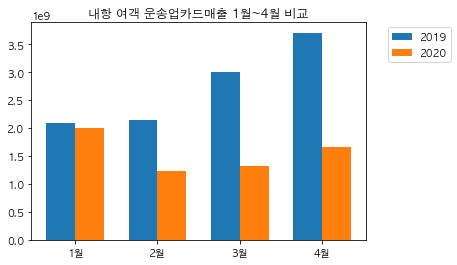

2019년 1월~4월과 2020년 1월~4월 카드매출 t-statistics 값은 2.805 이며, p-value는 0.031 입니다.
2019년 2월~4월과 2020년 2월~4월 카드매출 t-statistics 값은 3.310 이며, p-value는 0.030 입니다.
2019년 2월~4월에 비해 2020년 2월~4월 카드매출은 52.50%가 하락하였습니다.


In [42]:
# 2019년 1월~4월, 2020년 1월~4월 이용금액 비교 시각화

fig, ax = plt.subplots()

N = 4
ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, businessTypeAMT2019, width)

p2 = ax.bar(ind + width, businessTypeAMT2020, width)

ax.set_title('내항 여객 운송업 카드매출 1월~4월 비교')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('1월', '2월', '3월', '4월'))

ax.legend((p1[0], p2[0]), ('2019', '2020'), bbox_to_anchor=(1.05, 1))

plt.show()

# 이용금액 Sample T-test 실행

# 2019년 1월~4월, 2020년 1월~4월 이용금액 T-test
businessAMTttest = stats.ttest_ind(businessTypeAMT2019.values, businessTypeAMT2020.values)

print("2019년 1월~4월과 2020년 1월~4월 카드매출 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %businessAMTttest)

# 2019년 2월~4월, 2020년 2월~4월 이용금액 T-test
businessAMTttest_2 = stats.ttest_ind(businessTypeAMT2019_2.values, businessTypeAMT2020_2.values)

print("2019년 2월~4월과 2020년 2월~4월 카드매출 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %businessAMTttest_2)

# 매출 하락 %

AMT2019sum = sum(businessTypeAMT2019_2.values)
AMT2020sum = sum(businessTypeAMT2020_2.values)

AMTpercentage = (AMT2019sum - AMT2020sum) / AMT2019sum * 100
print("2019년 2월~4월에 비해 2020년 2월~4월 카드매출은 %.2f%%가 하락하였습니다." %AMTpercentage)


## 마사지업

Text(0.5, 1.0, '마사지업카드매출 추이')

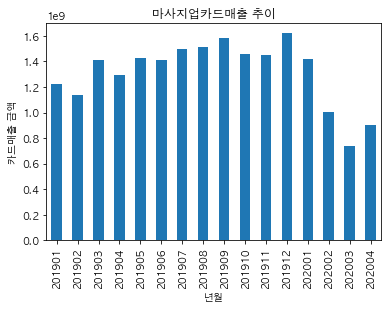

In [43]:
# 업종별 데이터 추출

businessTypeAMT = businessAMT['마사지업']

# 카드매출 시각화

businessTypeAMT.plot.bar()
plt.xlabel('년월')
plt.ylabel('카드매출 금액')
plt.title('마사지업카드매출 추이')


In [44]:
# 코로나 전후 비교 (2019년 1월~4월, 2020년 1월~4월)

# 2019년 1월~4월, 2020년 1월~4월 이용금액 합 데이터 추출

businessTypeAMT2019 = businessTypeAMT.loc['201901': '201904']
businessTypeAMT2020 = businessTypeAMT.loc['202001': '202004']

# 2019년 2월~4월, 2020년 2월~4월 이용건수 합 데이터 추출

businessTypeAMT2019_2 = businessTypeAMT.loc['201902': '201904']
businessTypeAMT2020_2 = businessTypeAMT.loc['202002': '202004']


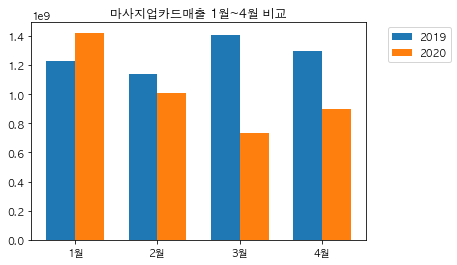

2019년 1월~4월과 2020년 1월~4월 카드매출 t-statistics 값은 1.592 이며, p-value는 0.162 입니다.
2019년 2월~4월과 2020년 2월~4월 카드매출 t-statistics 값은 3.572 이며, p-value는 0.023 입니다.
2019년 2월~4월에 비해 2020년 2월~4월 카드매출은 31.13%가 하락하였습니다.


In [45]:
# 2019년 1월~4월, 2020년 1월~4월 이용금액 비교 시각화

fig, ax = plt.subplots()

N = 4
ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, businessTypeAMT2019, width)

p2 = ax.bar(ind + width, businessTypeAMT2020, width)

ax.set_title('마사지업 카드매출 1월~4월 비교')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('1월', '2월', '3월', '4월'))

ax.legend((p1[0], p2[0]), ('2019', '2020'), bbox_to_anchor=(1.05, 1))

plt.show()

# 이용금액 Sample T-test 실행

# 2019년 1월~4월, 2020년 1월~4월 이용금액 T-test
businessAMTttest = stats.ttest_ind(businessTypeAMT2019.values, businessTypeAMT2020.values)

print("2019년 1월~4월과 2020년 1월~4월 카드매출 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %businessAMTttest)

# 2019년 2월~4월, 2020년 2월~4월 이용금액 T-test
businessAMTttest_2 = stats.ttest_ind(businessTypeAMT2019_2.values, businessTypeAMT2020_2.values)

print("2019년 2월~4월과 2020년 2월~4월 카드매출 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %businessAMTttest_2)

# 매출 하락 %

AMT2019sum = sum(businessTypeAMT2019_2.values)
AMT2020sum = sum(businessTypeAMT2020_2.values)

AMTpercentage = (AMT2019sum - AMT2020sum) / AMT2019sum * 100
print("2019년 2월~4월에 비해 2020년 2월~4월 카드매출은 %.2f%%가 하락하였습니다." %AMTpercentage)


## 면세점

Text(0.5, 1.0, '면세점카드매출 추이')

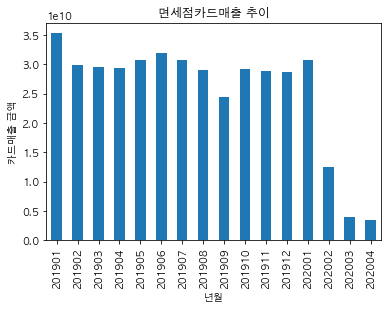

In [46]:
# 업종별 데이터 추출

businessTypeAMT = businessAMT['면세점']

# 카드매출 시각화

businessTypeAMT.plot.bar()
plt.xlabel('년월')
plt.ylabel('카드매출 금액')
plt.title('면세점카드매출 추이')


In [47]:
# 코로나 전후 비교 (2019년 1월~4월, 2020년 1월~4월)

# 2019년 1월~4월, 2020년 1월~4월 이용금액 합 데이터 추출

businessTypeAMT2019 = businessTypeAMT.loc['201901': '201904']
businessTypeAMT2020 = businessTypeAMT.loc['202001': '202004']

# 2019년 2월~4월, 2020년 2월~4월 이용건수 합 데이터 추출

businessTypeAMT2019_2 = businessTypeAMT.loc['201902': '201904']
businessTypeAMT2020_2 = businessTypeAMT.loc['202002': '202004']


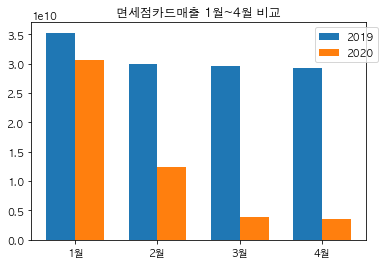

2019년 1월~4월과 2020년 1월~4월 카드매출 t-statistics 값은 2.830 이며, p-value는 0.030 입니다.
2019년 2월~4월과 2020년 2월~4월 카드매출 t-statistics 값은 7.885 이며, p-value는 0.001 입니다.
2019년 2월~4월에 비해 2020년 2월~4월 카드매출은 77.69%가 하락하였습니다.


In [48]:
# 2019년 1월~4월, 2020년 1월~4월 이용금액 비교 시각화

fig, ax = plt.subplots()

N = 4
ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, businessTypeAMT2019, width)

p2 = ax.bar(ind + width, businessTypeAMT2020, width)

ax.set_title('면세점 카드매출 1월~4월 비교')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('1월', '2월', '3월', '4월'))

ax.legend((p1[0], p2[0]), ('2019', '2020'), bbox_to_anchor=(1.05, 1))

plt.show()

# 이용금액 Sample T-test 실행

# 2019년 1월~4월, 2020년 1월~4월 이용금액 T-test
businessAMTttest = stats.ttest_ind(businessTypeAMT2019.values, businessTypeAMT2020.values)

print("2019년 1월~4월과 2020년 1월~4월 카드매출 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %businessAMTttest)

# 2019년 2월~4월, 2020년 2월~4월 이용금액 T-test
businessAMTttest_2 = stats.ttest_ind(businessTypeAMT2019_2.values, businessTypeAMT2020_2.values)

print("2019년 2월~4월과 2020년 2월~4월 카드매출 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %businessAMTttest_2)

# 매출 하락 %

AMT2019sum = sum(businessTypeAMT2019_2.values)
AMT2020sum = sum(businessTypeAMT2020_2.values)

AMTpercentage = (AMT2019sum - AMT2020sum) / AMT2019sum * 100
print("2019년 2월~4월에 비해 2020년 2월~4월 카드매출은 %.2f%%가 하락하였습니다." %AMTpercentage)


## 버스 운송업

Text(0.5, 1.0, '버스 운송업카드매출 추이')

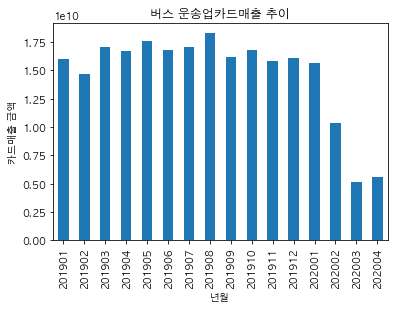

In [49]:
# 업종별 데이터 추출

businessTypeAMT = businessAMT['버스 운송업']

# 카드매출 시각화

businessTypeAMT.plot.bar()
plt.xlabel('년월')
plt.ylabel('카드매출 금액')
plt.title('버스 운송업카드매출 추이')


In [50]:
# 코로나 전후 비교 (2019년 1월~4월, 2020년 1월~4월)

# 2019년 1월~4월, 2020년 1월~4월 이용금액 합 데이터 추출

businessTypeAMT2019 = businessTypeAMT.loc['201901': '201904']
businessTypeAMT2020 = businessTypeAMT.loc['202001': '202004']

# 2019년 2월~4월, 2020년 2월~4월 이용건수 합 데이터 추출

businessTypeAMT2019_2 = businessTypeAMT.loc['201902': '201904']
businessTypeAMT2020_2 = businessTypeAMT.loc['202002': '202004']


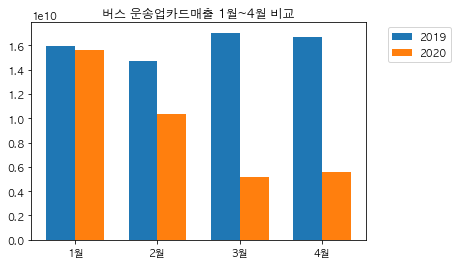

2019년 1월~4월과 2020년 1월~4월 카드매출 t-statistics 값은 2.763 이며, p-value는 0.033 입니다.
2019년 2월~4월과 2020년 2월~4월 카드매출 t-statistics 값은 5.057 이며, p-value는 0.007 입니다.
2019년 2월~4월에 비해 2020년 2월~4월 카드매출은 56.40%가 하락하였습니다.


In [51]:
# 2019년 1월~4월, 2020년 1월~4월 이용금액 비교 시각화

fig, ax = plt.subplots()

N = 4
ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, businessTypeAMT2019, width)

p2 = ax.bar(ind + width, businessTypeAMT2020, width)

ax.set_title('버스 운송업 카드매출 1월~4월 비교')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('1월', '2월', '3월', '4월'))

ax.legend((p1[0], p2[0]), ('2019', '2020'), bbox_to_anchor=(1.05, 1))

plt.show()

# 이용금액 Sample T-test 실행

# 2019년 1월~4월, 2020년 1월~4월 이용금액 T-test
businessAMTttest = stats.ttest_ind(businessTypeAMT2019.values, businessTypeAMT2020.values)

print("2019년 1월~4월과 2020년 1월~4월 카드매출 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %businessAMTttest)

# 2019년 2월~4월, 2020년 2월~4월 이용금액 T-test
businessAMTttest_2 = stats.ttest_ind(businessTypeAMT2019_2.values, businessTypeAMT2020_2.values)

print("2019년 2월~4월과 2020년 2월~4월 카드매출 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %businessAMTttest_2)

# 매출 하락 %

AMT2019sum = sum(businessTypeAMT2019_2.values)
AMT2020sum = sum(businessTypeAMT2020_2.values)

AMTpercentage = (AMT2019sum - AMT2020sum) / AMT2019sum * 100
print("2019년 2월~4월에 비해 2020년 2월~4월 카드매출은 %.2f%%가 하락하였습니다." %AMTpercentage)


## 비알콜 음료점업

Text(0.5, 1.0, '비알콜 음료점업카드매출 추이')

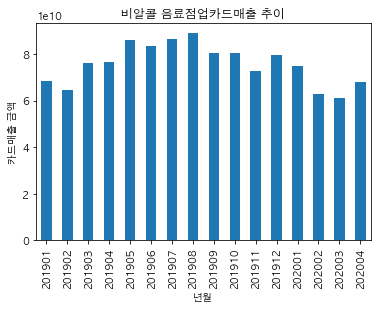

In [52]:
# 업종별 데이터 추출

businessTypeAMT = businessAMT['비알콜 음료점업']

# 카드매출 시각화

businessTypeAMT.plot.bar()
plt.xlabel('년월')
plt.ylabel('카드매출 금액')
plt.title('비알콜 음료점업카드매출 추이')


In [53]:
# 코로나 전후 비교 (2019년 1월~4월, 2020년 1월~4월)

# 2019년 1월~4월, 2020년 1월~4월 이용금액 합 데이터 추출

businessTypeAMT2019 = businessTypeAMT.loc['201901': '201904']
businessTypeAMT2020 = businessTypeAMT.loc['202001': '202004']

# 2019년 2월~4월, 2020년 2월~4월 이용건수 합 데이터 추출

businessTypeAMT2019_2 = businessTypeAMT.loc['201902': '201904']
businessTypeAMT2020_2 = businessTypeAMT.loc['202002': '202004']


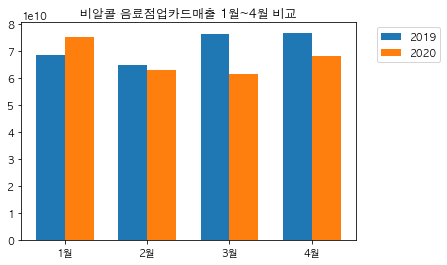

2019년 1월~4월과 2020년 1월~4월 카드매출 t-statistics 값은 1.081 이며, p-value는 0.321 입니다.
2019년 2월~4월과 2020년 2월~4월 카드매출 t-statistics 값은 1.871 이며, p-value는 0.135 입니다.
2019년 2월~4월에 비해 2020년 2월~4월 카드매출은 11.53%가 하락하였습니다.


In [54]:
# 2019년 1월~4월, 2020년 1월~4월 이용금액 비교 시각화

fig, ax = plt.subplots()

N = 4
ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, businessTypeAMT2019, width)

p2 = ax.bar(ind + width, businessTypeAMT2020, width)

ax.set_title('비알콜 음료점업 카드매출 1월~4월 비교')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('1월', '2월', '3월', '4월'))

ax.legend((p1[0], p2[0]), ('2019', '2020'), bbox_to_anchor=(1.05, 1))

plt.show()

# 이용금액 Sample T-test 실행

# 2019년 1월~4월, 2020년 1월~4월 이용금액 T-test
businessAMTttest = stats.ttest_ind(businessTypeAMT2019.values, businessTypeAMT2020.values)

print("2019년 1월~4월과 2020년 1월~4월 카드매출 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %businessAMTttest)

# 2019년 2월~4월, 2020년 2월~4월 이용금액 T-test
businessAMTttest_2 = stats.ttest_ind(businessTypeAMT2019_2.values, businessTypeAMT2020_2.values)

print("2019년 2월~4월과 2020년 2월~4월 카드매출 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %businessAMTttest_2)

# 매출 하락 %

AMT2019sum = sum(businessTypeAMT2019_2.values)
AMT2020sum = sum(businessTypeAMT2020_2.values)

AMTpercentage = (AMT2019sum - AMT2020sum) / AMT2019sum * 100
print("2019년 2월~4월에 비해 2020년 2월~4월 카드매출은 %.2f%%가 하락하였습니다." %AMTpercentage)


## 빵 및 과자류 소매업

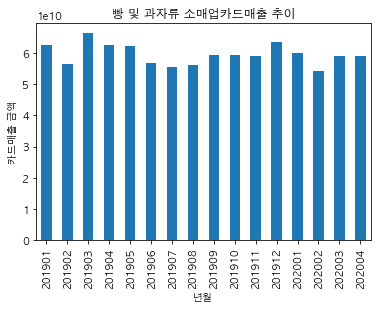

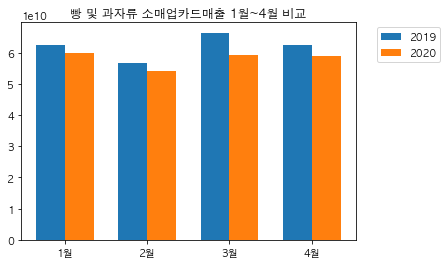

2019년 1월~4월과 2020년 1월~4월 카드매출 t-statistics 값은 1.624 이며, p-value는 0.156 입니다.
2019년 2월~4월과 2020년 2월~4월 카드매출 t-statistics 값은 1.336 이며, p-value는 0.253 입니다.
2019년 2월~4월에 비해 2020년 2월~4월 카드매출은 7.10%가 하락하였습니다.


In [55]:
# 업종별 데이터 추출

businessTypeAMT = businessAMT['빵 및 과자류 소매업']

# 카드매출 시각화

businessTypeAMT.plot.bar()
plt.xlabel('년월')
plt.ylabel('카드매출 금액')
plt.title('빵 및 과자류 소매업카드매출 추이')

# 코로나 전후 비교 (2019년 1월~4월, 2020년 1월~4월)

# 2019년 1월~4월, 2020년 1월~4월 이용금액 합 데이터 추출

businessTypeAMT2019 = businessTypeAMT.loc['201901': '201904']
businessTypeAMT2020 = businessTypeAMT.loc['202001': '202004']

# 2019년 2월~4월, 2020년 2월~4월 이용건수 합 데이터 추출

businessTypeAMT2019_2 = businessTypeAMT.loc['201902': '201904']
businessTypeAMT2020_2 = businessTypeAMT.loc['202002': '202004']

# 2019년 1월~4월, 2020년 1월~4월 이용금액 비교 시각화

fig, ax = plt.subplots()

N = 4
ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, businessTypeAMT2019, width)

p2 = ax.bar(ind + width, businessTypeAMT2020, width)

ax.set_title('빵 및 과자류 소매업 카드매출 1월~4월 비교')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('1월', '2월', '3월', '4월'))

ax.legend((p1[0], p2[0]), ('2019', '2020'), bbox_to_anchor=(1.05, 1))

plt.show()

# 이용금액 Sample T-test 실행

# 2019년 1월~4월, 2020년 1월~4월 이용금액 T-test
businessAMTttest = stats.ttest_ind(businessTypeAMT2019.values, businessTypeAMT2020.values)

print("2019년 1월~4월과 2020년 1월~4월 카드매출 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %businessAMTttest)

# 2019년 2월~4월, 2020년 2월~4월 이용금액 T-test
businessAMTttest_2 = stats.ttest_ind(businessTypeAMT2019_2.values, businessTypeAMT2020_2.values)

print("2019년 2월~4월과 2020년 2월~4월 카드매출 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %businessAMTttest_2)

# 매출 하락 %

AMT2019sum = sum(businessTypeAMT2019_2.values)
AMT2020sum = sum(businessTypeAMT2020_2.values)

AMTpercentage = (AMT2019sum - AMT2020sum) / AMT2019sum * 100
print("2019년 2월~4월에 비해 2020년 2월~4월 카드매출은 %.2f%%가 하락하였습니다." %AMTpercentage)


## 서양식 음식점업

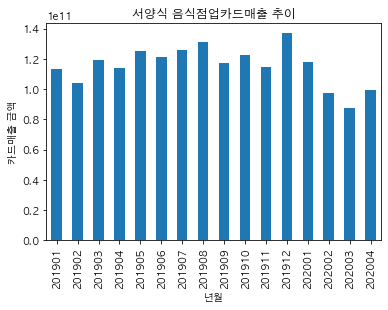

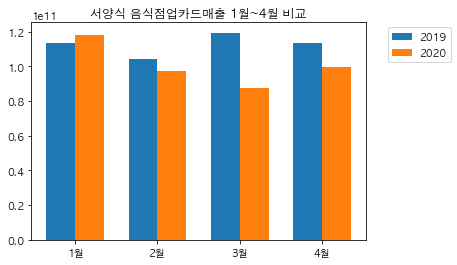

2019년 1월~4월과 2020년 1월~4월 카드매출 t-statistics 값은 1.717 이며, p-value는 0.137 입니다.
2019년 2월~4월과 2020년 2월~4월 카드매출 t-statistics 값은 3.062 이며, p-value는 0.038 입니다.
2019년 2월~4월에 비해 2020년 2월~4월 카드매출은 15.79%가 하락하였습니다.


In [56]:
# 업종별 데이터 추출

businessTypeAMT = businessAMT['서양식 음식점업']

# 카드매출 시각화

businessTypeAMT.plot.bar()
plt.xlabel('년월')
plt.ylabel('카드매출 금액')
plt.title('서양식 음식점업카드매출 추이')

# 코로나 전후 비교 (2019년 1월~4월, 2020년 1월~4월)

# 2019년 1월~4월, 2020년 1월~4월 이용금액 합 데이터 추출

businessTypeAMT2019 = businessTypeAMT.loc['201901': '201904']
businessTypeAMT2020 = businessTypeAMT.loc['202001': '202004']

# 2019년 2월~4월, 2020년 2월~4월 이용건수 합 데이터 추출

businessTypeAMT2019_2 = businessTypeAMT.loc['201902': '201904']
businessTypeAMT2020_2 = businessTypeAMT.loc['202002': '202004']

# 2019년 1월~4월, 2020년 1월~4월 이용금액 비교 시각화

fig, ax = plt.subplots()

N = 4
ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, businessTypeAMT2019, width)

p2 = ax.bar(ind + width, businessTypeAMT2020, width)

ax.set_title('서양식 음식점업 카드매출 1월~4월 비교')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('1월', '2월', '3월', '4월'))

ax.legend((p1[0], p2[0]), ('2019', '2020'), bbox_to_anchor=(1.05, 1))

plt.show()

# 이용금액 Sample T-test 실행

# 2019년 1월~4월, 2020년 1월~4월 이용금액 T-test
businessAMTttest = stats.ttest_ind(businessTypeAMT2019.values, businessTypeAMT2020.values)

print("2019년 1월~4월과 2020년 1월~4월 카드매출 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %businessAMTttest)

# 2019년 2월~4월, 2020년 2월~4월 이용금액 T-test
businessAMTttest_2 = stats.ttest_ind(businessTypeAMT2019_2.values, businessTypeAMT2020_2.values)

print("2019년 2월~4월과 2020년 2월~4월 카드매출 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %businessAMTttest_2)

# 매출 하락 %

AMT2019sum = sum(businessTypeAMT2019_2.values)
AMT2020sum = sum(businessTypeAMT2020_2.values)

AMTpercentage = (AMT2019sum - AMT2020sum) / AMT2019sum * 100
print("2019년 2월~4월에 비해 2020년 2월~4월 카드매출은 %.2f%%가 하락하였습니다." %AMTpercentage)


## 수산물 소매업

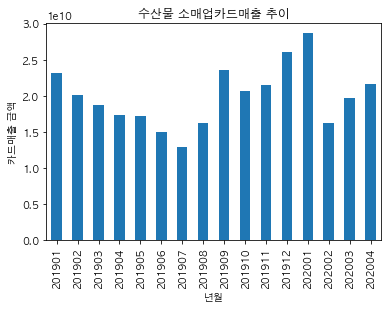

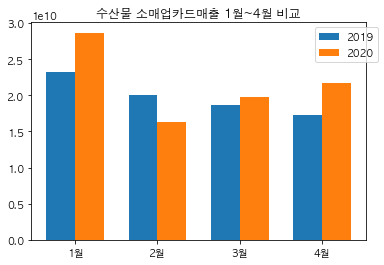

2019년 1월~4월과 2020년 1월~4월 카드매출 t-statistics 값은 -0.609 이며, p-value는 0.565 입니다.
2019년 2월~4월과 2020년 2월~4월 카드매출 t-statistics 값은 -0.298 이며, p-value는 0.780 입니다.
2019년 2월~4월에 비해 2020년 2월~4월 카드매출은 -2.82%가 하락하였습니다.


In [57]:
# 업종별 데이터 추출

businessTypeAMT = businessAMT['수산물 소매업']

# 카드매출 시각화

businessTypeAMT.plot.bar()
plt.xlabel('년월')
plt.ylabel('카드매출 금액')
plt.title('수산물 소매업카드매출 추이')

# 코로나 전후 비교 (2019년 1월~4월, 2020년 1월~4월)

# 2019년 1월~4월, 2020년 1월~4월 이용금액 합 데이터 추출

businessTypeAMT2019 = businessTypeAMT.loc['201901': '201904']
businessTypeAMT2020 = businessTypeAMT.loc['202001': '202004']

# 2019년 2월~4월, 2020년 2월~4월 이용건수 합 데이터 추출

businessTypeAMT2019_2 = businessTypeAMT.loc['201902': '201904']
businessTypeAMT2020_2 = businessTypeAMT.loc['202002': '202004']

# 2019년 1월~4월, 2020년 1월~4월 이용금액 비교 시각화

fig, ax = plt.subplots()

N = 4
ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, businessTypeAMT2019, width)

p2 = ax.bar(ind + width, businessTypeAMT2020, width)

ax.set_title('수산물 소매업 카드매출 1월~4월 비교')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('1월', '2월', '3월', '4월'))

ax.legend((p1[0], p2[0]), ('2019', '2020'), bbox_to_anchor=(1.05, 1))

plt.show()

# 이용금액 Sample T-test 실행

# 2019년 1월~4월, 2020년 1월~4월 이용금액 T-test
businessAMTttest = stats.ttest_ind(businessTypeAMT2019.values, businessTypeAMT2020.values)

print("2019년 1월~4월과 2020년 1월~4월 카드매출 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %businessAMTttest)

# 2019년 2월~4월, 2020년 2월~4월 이용금액 T-test
businessAMTttest_2 = stats.ttest_ind(businessTypeAMT2019_2.values, businessTypeAMT2020_2.values)

print("2019년 2월~4월과 2020년 2월~4월 카드매출 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %businessAMTttest_2)

# 매출 하락 %

AMT2019sum = sum(businessTypeAMT2019_2.values)
AMT2020sum = sum(businessTypeAMT2020_2.values)

AMTpercentage = (AMT2019sum - AMT2020sum) / AMT2019sum * 100
print("2019년 2월~4월에 비해 2020년 2월~4월 카드매출은 %.2f%%가 하락하였습니다." %AMTpercentage)


## 슈퍼마켓

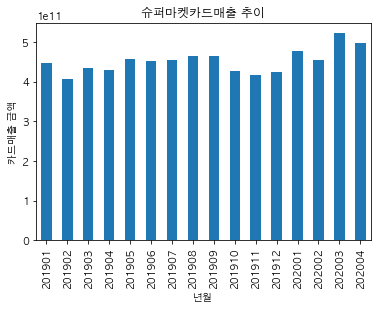

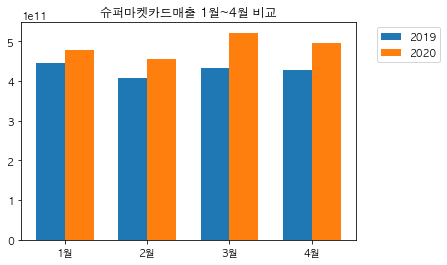

2019년 1월~4월과 2020년 1월~4월 카드매출 t-statistics 값은 -3.596 이며, p-value는 0.011 입니다.
2019년 2월~4월과 2020년 2월~4월 카드매출 t-statistics 값은 -3.232 이며, p-value는 0.032 입니다.
2019년 2월~4월에 비해 2020년 2월~4월 카드매출은 -16.07%가 하락하였습니다.


In [58]:
# 업종별 데이터 추출

businessTypeAMT = businessAMT['슈퍼마켓']

# 카드매출 시각화

businessTypeAMT.plot.bar()
plt.xlabel('년월')
plt.ylabel('카드매출 금액')
plt.title('슈퍼마켓카드매출 추이')

# 코로나 전후 비교 (2019년 1월~4월, 2020년 1월~4월)

# 2019년 1월~4월, 2020년 1월~4월 이용금액 합 데이터 추출

businessTypeAMT2019 = businessTypeAMT.loc['201901': '201904']
businessTypeAMT2020 = businessTypeAMT.loc['202001': '202004']

# 2019년 2월~4월, 2020년 2월~4월 이용건수 합 데이터 추출

businessTypeAMT2019_2 = businessTypeAMT.loc['201902': '201904']
businessTypeAMT2020_2 = businessTypeAMT.loc['202002': '202004']

# 2019년 1월~4월, 2020년 1월~4월 이용금액 비교 시각화

fig, ax = plt.subplots()

N = 4
ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, businessTypeAMT2019, width)

p2 = ax.bar(ind + width, businessTypeAMT2020, width)

ax.set_title('슈퍼마켓 카드매출 1월~4월 비교')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('1월', '2월', '3월', '4월'))

ax.legend((p1[0], p2[0]), ('2019', '2020'), bbox_to_anchor=(1.05, 1))

plt.show()

# 이용금액 Sample T-test 실행

# 2019년 1월~4월, 2020년 1월~4월 이용금액 T-test
businessAMTttest = stats.ttest_ind(businessTypeAMT2019.values, businessTypeAMT2020.values)

print("2019년 1월~4월과 2020년 1월~4월 카드매출 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %businessAMTttest)

# 2019년 2월~4월, 2020년 2월~4월 이용금액 T-test
businessAMTttest_2 = stats.ttest_ind(businessTypeAMT2019_2.values, businessTypeAMT2020_2.values)

print("2019년 2월~4월과 2020년 2월~4월 카드매출 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %businessAMTttest_2)

# 매출 하락 %

AMT2019sum = sum(businessTypeAMT2019_2.values)
AMT2020sum = sum(businessTypeAMT2020_2.values)

AMTpercentage = (AMT2019sum - AMT2020sum) / AMT2019sum * 100
print("2019년 2월~4월에 비해 2020년 2월~4월 카드매출은 %.2f%%가 하락하였습니다." %AMTpercentage)


## 스포츠 및 레크레이션 용품 임대업

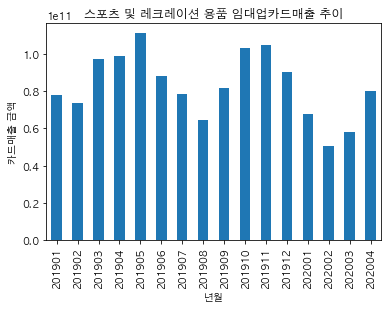

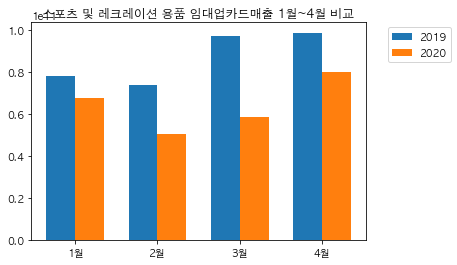

2019년 1월~4월과 2020년 1월~4월 카드매출 t-statistics 값은 2.519 이며, p-value는 0.045 입니다.
2019년 2월~4월과 2020년 2월~4월 카드매출 t-statistics 값은 2.247 이며, p-value는 0.088 입니다.
2019년 2월~4월에 비해 2020년 2월~4월 카드매출은 29.92%가 하락하였습니다.


In [59]:
# 업종별 데이터 추출

businessTypeAMT = businessAMT['스포츠 및 레크레이션 용품 임대업']

# 카드매출 시각화

businessTypeAMT.plot.bar()
plt.xlabel('년월')
plt.ylabel('카드매출 금액')
plt.title('스포츠 및 레크레이션 용품 임대업카드매출 추이')

# 코로나 전후 비교 (2019년 1월~4월, 2020년 1월~4월)

# 2019년 1월~4월, 2020년 1월~4월 이용금액 합 데이터 추출

businessTypeAMT2019 = businessTypeAMT.loc['201901': '201904']
businessTypeAMT2020 = businessTypeAMT.loc['202001': '202004']

# 2019년 2월~4월, 2020년 2월~4월 이용건수 합 데이터 추출

businessTypeAMT2019_2 = businessTypeAMT.loc['201902': '201904']
businessTypeAMT2020_2 = businessTypeAMT.loc['202002': '202004']

# 2019년 1월~4월, 2020년 1월~4월 이용금액 비교 시각화

fig, ax = plt.subplots()

N = 4
ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, businessTypeAMT2019, width)

p2 = ax.bar(ind + width, businessTypeAMT2020, width)

ax.set_title('스포츠 및 레크레이션 용품 임대업 카드매출 1월~4월 비교')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('1월', '2월', '3월', '4월'))

ax.legend((p1[0], p2[0]), ('2019', '2020'), bbox_to_anchor=(1.05, 1))

plt.show()

# 이용금액 Sample T-test 실행

# 2019년 1월~4월, 2020년 1월~4월 이용금액 T-test
businessAMTttest = stats.ttest_ind(businessTypeAMT2019.values, businessTypeAMT2020.values)

print("2019년 1월~4월과 2020년 1월~4월 카드매출 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %businessAMTttest)

# 2019년 2월~4월, 2020년 2월~4월 이용금액 T-test
businessAMTttest_2 = stats.ttest_ind(businessTypeAMT2019_2.values, businessTypeAMT2020_2.values)

print("2019년 2월~4월과 2020년 2월~4월 카드매출 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %businessAMTttest_2)

# 매출 하락 %

AMT2019sum = sum(businessTypeAMT2019_2.values)
AMT2020sum = sum(businessTypeAMT2020_2.values)

AMTpercentage = (AMT2019sum - AMT2020sum) / AMT2019sum * 100
print("2019년 2월~4월에 비해 2020년 2월~4월 카드매출은 %.2f%%가 하락하였습니다." %AMTpercentage)


## 여관업

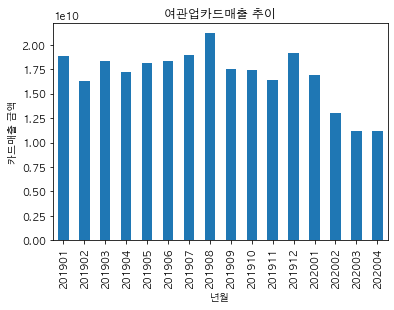

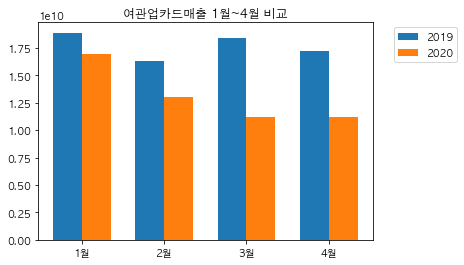

2019년 1월~4월과 2020년 1월~4월 카드매출 t-statistics 값은 3.154 이며, p-value는 0.020 입니다.
2019년 2월~4월과 2020년 2월~4월 카드매출 t-statistics 값은 6.445 이며, p-value는 0.003 입니다.
2019년 2월~4월에 비해 2020년 2월~4월 카드매출은 31.94%가 하락하였습니다.


In [60]:
# 업종별 데이터 추출

businessTypeAMT = businessAMT['여관업']

# 카드매출 시각화

businessTypeAMT.plot.bar()
plt.xlabel('년월')
plt.ylabel('카드매출 금액')
plt.title('여관업카드매출 추이')

# 코로나 전후 비교 (2019년 1월~4월, 2020년 1월~4월)

# 2019년 1월~4월, 2020년 1월~4월 이용금액 합 데이터 추출

businessTypeAMT2019 = businessTypeAMT.loc['201901': '201904']
businessTypeAMT2020 = businessTypeAMT.loc['202001': '202004']

# 2019년 2월~4월, 2020년 2월~4월 이용건수 합 데이터 추출

businessTypeAMT2019_2 = businessTypeAMT.loc['201902': '201904']
businessTypeAMT2020_2 = businessTypeAMT.loc['202002': '202004']

# 2019년 1월~4월, 2020년 1월~4월 이용금액 비교 시각화

fig, ax = plt.subplots()

N = 4
ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, businessTypeAMT2019, width)

p2 = ax.bar(ind + width, businessTypeAMT2020, width)

ax.set_title('여관업 카드매출 1월~4월 비교')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('1월', '2월', '3월', '4월'))

ax.legend((p1[0], p2[0]), ('2019', '2020'), bbox_to_anchor=(1.05, 1))

plt.show()

# 이용금액 Sample T-test 실행

# 2019년 1월~4월, 2020년 1월~4월 이용금액 T-test
businessAMTttest = stats.ttest_ind(businessTypeAMT2019.values, businessTypeAMT2020.values)

print("2019년 1월~4월과 2020년 1월~4월 카드매출 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %businessAMTttest)

# 2019년 2월~4월, 2020년 2월~4월 이용금액 T-test
businessAMTttest_2 = stats.ttest_ind(businessTypeAMT2019_2.values, businessTypeAMT2020_2.values)

print("2019년 2월~4월과 2020년 2월~4월 카드매출 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %businessAMTttest_2)

# 매출 하락 %

AMT2019sum = sum(businessTypeAMT2019_2.values)
AMT2020sum = sum(businessTypeAMT2020_2.values)

AMTpercentage = (AMT2019sum - AMT2020sum) / AMT2019sum * 100
print("2019년 2월~4월에 비해 2020년 2월~4월 카드매출은 %.2f%%가 하락하였습니다." %AMTpercentage)


## 여행사업

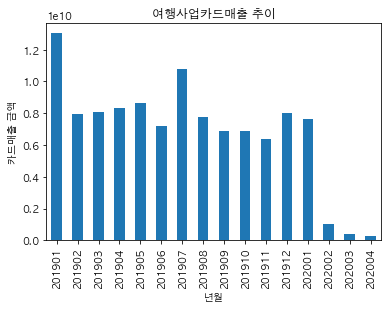

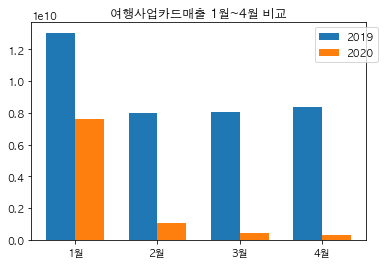

2019년 1월~4월과 2020년 1월~4월 카드매출 t-statistics 값은 3.256 이며, p-value는 0.017 입니다.
2019년 2월~4월과 2020년 2월~4월 카드매출 t-statistics 값은 29.349 이며, p-value는 0.000 입니다.
2019년 2월~4월에 비해 2020년 2월~4월 카드매출은 92.91%가 하락하였습니다.


In [61]:
# 업종별 데이터 추출

businessTypeAMT = businessAMT['여행사업']

# 카드매출 시각화

businessTypeAMT.plot.bar()
plt.xlabel('년월')
plt.ylabel('카드매출 금액')
plt.title('여행사업카드매출 추이')

# 코로나 전후 비교 (2019년 1월~4월, 2020년 1월~4월)

# 2019년 1월~4월, 2020년 1월~4월 이용금액 합 데이터 추출

businessTypeAMT2019 = businessTypeAMT.loc['201901': '201904']
businessTypeAMT2020 = businessTypeAMT.loc['202001': '202004']

# 2019년 2월~4월, 2020년 2월~4월 이용건수 합 데이터 추출

businessTypeAMT2019_2 = businessTypeAMT.loc['201902': '201904']
businessTypeAMT2020_2 = businessTypeAMT.loc['202002': '202004']

# 2019년 1월~4월, 2020년 1월~4월 이용금액 비교 시각화

fig, ax = plt.subplots()

N = 4
ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, businessTypeAMT2019, width)

p2 = ax.bar(ind + width, businessTypeAMT2020, width)

ax.set_title('여행사업 카드매출 1월~4월 비교')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('1월', '2월', '3월', '4월'))

ax.legend((p1[0], p2[0]), ('2019', '2020'), bbox_to_anchor=(1.05, 1))

plt.show()

# 이용금액 Sample T-test 실행

# 2019년 1월~4월, 2020년 1월~4월 이용금액 T-test
businessAMTttest = stats.ttest_ind(businessTypeAMT2019.values, businessTypeAMT2020.values)

print("2019년 1월~4월과 2020년 1월~4월 카드매출 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %businessAMTttest)

# 2019년 2월~4월, 2020년 2월~4월 이용금액 T-test
businessAMTttest_2 = stats.ttest_ind(businessTypeAMT2019_2.values, businessTypeAMT2020_2.values)

print("2019년 2월~4월과 2020년 2월~4월 카드매출 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %businessAMTttest_2)

# 매출 하락 %

AMT2019sum = sum(businessTypeAMT2019_2.values)
AMT2020sum = sum(businessTypeAMT2020_2.values)

AMTpercentage = (AMT2019sum - AMT2020sum) / AMT2019sum * 100
print("2019년 2월~4월에 비해 2020년 2월~4월 카드매출은 %.2f%%가 하락하였습니다." %AMTpercentage)


## 욕탕업

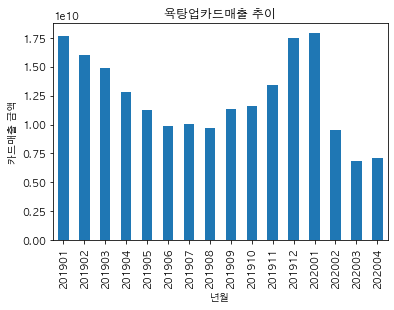

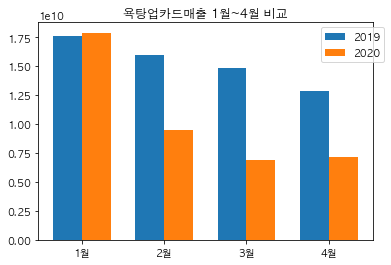

2019년 1월~4월과 2020년 1월~4월 카드매출 t-statistics 값은 1.794 이며, p-value는 0.123 입니다.
2019년 2월~4월과 2020년 2월~4월 카드매출 t-statistics 값은 5.394 이며, p-value는 0.006 입니다.
2019년 2월~4월에 비해 2020년 2월~4월 카드매출은 46.25%가 하락하였습니다.


In [62]:
# 업종별 데이터 추출

businessTypeAMT = businessAMT['욕탕업']

# 카드매출 시각화

businessTypeAMT.plot.bar()
plt.xlabel('년월')
plt.ylabel('카드매출 금액')
plt.title('욕탕업카드매출 추이')

# 코로나 전후 비교 (2019년 1월~4월, 2020년 1월~4월)

# 2019년 1월~4월, 2020년 1월~4월 이용금액 합 데이터 추출

businessTypeAMT2019 = businessTypeAMT.loc['201901': '201904']
businessTypeAMT2020 = businessTypeAMT.loc['202001': '202004']

# 2019년 2월~4월, 2020년 2월~4월 이용건수 합 데이터 추출

businessTypeAMT2019_2 = businessTypeAMT.loc['201902': '201904']
businessTypeAMT2020_2 = businessTypeAMT.loc['202002': '202004']

# 2019년 1월~4월, 2020년 1월~4월 이용금액 비교 시각화

fig, ax = plt.subplots()

N = 4
ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, businessTypeAMT2019, width)

p2 = ax.bar(ind + width, businessTypeAMT2020, width)

ax.set_title('욕탕업 카드매출 1월~4월 비교')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('1월', '2월', '3월', '4월'))

ax.legend((p1[0], p2[0]), ('2019', '2020'), bbox_to_anchor=(1.05, 1))

plt.show()

# 이용금액 Sample T-test 실행

# 2019년 1월~4월, 2020년 1월~4월 이용금액 T-test
businessAMTttest = stats.ttest_ind(businessTypeAMT2019.values, businessTypeAMT2020.values)

print("2019년 1월~4월과 2020년 1월~4월 카드매출 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %businessAMTttest)

# 2019년 2월~4월, 2020년 2월~4월 이용금액 T-test
businessAMTttest_2 = stats.ttest_ind(businessTypeAMT2019_2.values, businessTypeAMT2020_2.values)

print("2019년 2월~4월과 2020년 2월~4월 카드매출 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %businessAMTttest_2)

# 매출 하락 %

AMT2019sum = sum(businessTypeAMT2019_2.values)
AMT2020sum = sum(businessTypeAMT2020_2.values)

AMTpercentage = (AMT2019sum - AMT2020sum) / AMT2019sum * 100
print("2019년 2월~4월에 비해 2020년 2월~4월 카드매출은 %.2f%%가 하락하였습니다." %AMTpercentage)


## 육류 소매업

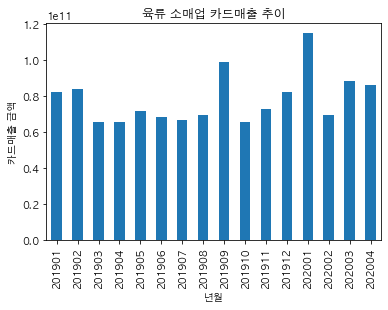

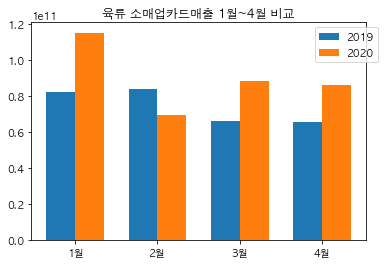

2019년 1월~4월과 2020년 1월~4월 카드매출 t-statistics 값은 -1.442 이며, p-value는 0.199 입니다.
2019년 2월~4월과 2020년 2월~4월 카드매출 t-statistics 값은 -1.131 이며, p-value는 0.321 입니다.
2019년 2월~4월에 비해 2020년 2월~4월 카드매출은 -13.40%가 하락하였습니다.


In [63]:
# 업종별 데이터 추출

businessTypeAMT = businessAMT['육류 소매업']

# 카드매출 시각화

businessTypeAMT.plot.bar()
plt.xlabel('년월')
plt.ylabel('카드매출 금액')
plt.title('육류 소매업 카드매출 추이')

# 코로나 전후 비교 (2019년 1월~4월, 2020년 1월~4월)

# 2019년 1월~4월, 2020년 1월~4월 이용금액 합 데이터 추출

businessTypeAMT2019 = businessTypeAMT.loc['201901': '201904']
businessTypeAMT2020 = businessTypeAMT.loc['202001': '202004']

# 2019년 2월~4월, 2020년 2월~4월 이용건수 합 데이터 추출

businessTypeAMT2019_2 = businessTypeAMT.loc['201902': '201904']
businessTypeAMT2020_2 = businessTypeAMT.loc['202002': '202004']

# 2019년 1월~4월, 2020년 1월~4월 이용금액 비교 시각화

fig, ax = plt.subplots()

N = 4
ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, businessTypeAMT2019, width)

p2 = ax.bar(ind + width, businessTypeAMT2020, width)

ax.set_title('육류 소매업카드매출 1월~4월 비교')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('1월', '2월', '3월', '4월'))

ax.legend((p1[0], p2[0]), ('2019', '2020'), bbox_to_anchor=(1.05, 1))

plt.show()

# 이용금액 Sample T-test 실행

# 2019년 1월~4월, 2020년 1월~4월 이용금액 T-test
businessAMTttest = stats.ttest_ind(businessTypeAMT2019.values, businessTypeAMT2020.values)

print("2019년 1월~4월과 2020년 1월~4월 카드매출 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %businessAMTttest)

# 2019년 2월~4월, 2020년 2월~4월 이용금액 T-test
businessAMTttest_2 = stats.ttest_ind(businessTypeAMT2019_2.values, businessTypeAMT2020_2.values)

print("2019년 2월~4월과 2020년 2월~4월 카드매출 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %businessAMTttest_2)

# 매출 하락 %

AMT2019sum = sum(businessTypeAMT2019_2.values)
AMT2020sum = sum(businessTypeAMT2020_2.values)

AMTpercentage = (AMT2019sum - AMT2020sum) / AMT2019sum * 100
print("2019년 2월~4월에 비해 2020년 2월~4월 카드매출은 %.2f%%가 하락하였습니다." %AMTpercentage)


## 일반유흥 주점업

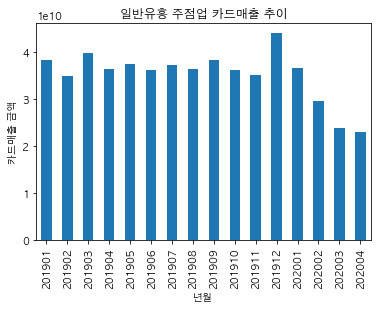

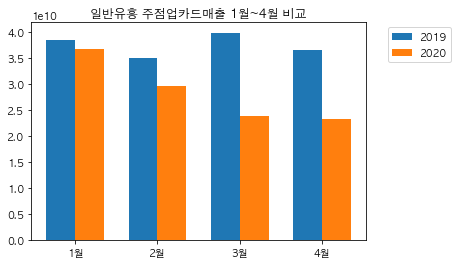

2019년 1월~4월과 2020년 1월~4월 카드매출 t-statistics 값은 2.747 이며, p-value는 0.033 입니다.
2019년 2월~4월과 2020년 2월~4월 카드매출 t-statistics 값은 4.605 이며, p-value는 0.010 입니다.
2019년 2월~4월에 비해 2020년 2월~4월 카드매출은 31.06%가 하락하였습니다.


In [64]:
# 업종별 데이터 추출

businessTypeAMT = businessAMT['일반유흥 주점업']

# 카드매출 시각화

businessTypeAMT.plot.bar()
plt.xlabel('년월')
plt.ylabel('카드매출 금액')
plt.title('일반유흥 주점업 카드매출 추이')

# 코로나 전후 비교 (2019년 1월~4월, 2020년 1월~4월)

# 2019년 1월~4월, 2020년 1월~4월 이용금액 합 데이터 추출

businessTypeAMT2019 = businessTypeAMT.loc['201901': '201904']
businessTypeAMT2020 = businessTypeAMT.loc['202001': '202004']

# 2019년 2월~4월, 2020년 2월~4월 이용건수 합 데이터 추출

businessTypeAMT2019_2 = businessTypeAMT.loc['201902': '201904']
businessTypeAMT2020_2 = businessTypeAMT.loc['202002': '202004']

# 2019년 1월~4월, 2020년 1월~4월 이용금액 비교 시각화

fig, ax = plt.subplots()

N = 4
ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, businessTypeAMT2019, width)

p2 = ax.bar(ind + width, businessTypeAMT2020, width)

ax.set_title('일반유흥 주점업카드매출 1월~4월 비교')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('1월', '2월', '3월', '4월'))

ax.legend((p1[0], p2[0]), ('2019', '2020'), bbox_to_anchor=(1.05, 1))

plt.show()

# 이용금액 Sample T-test 실행

# 2019년 1월~4월, 2020년 1월~4월 이용금액 T-test
businessAMTttest = stats.ttest_ind(businessTypeAMT2019.values, businessTypeAMT2020.values)

print("2019년 1월~4월과 2020년 1월~4월 카드매출 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %businessAMTttest)

# 2019년 2월~4월, 2020년 2월~4월 이용금액 T-test
businessAMTttest_2 = stats.ttest_ind(businessTypeAMT2019_2.values, businessTypeAMT2020_2.values)

print("2019년 2월~4월과 2020년 2월~4월 카드매출 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %businessAMTttest_2)

# 매출 하락 %

AMT2019sum = sum(businessTypeAMT2019_2.values)
AMT2020sum = sum(businessTypeAMT2020_2.values)

AMTpercentage = (AMT2019sum - AMT2020sum) / AMT2019sum * 100
print("2019년 2월~4월에 비해 2020년 2월~4월 카드매출은 %.2f%%가 하락하였습니다." %AMTpercentage)


## 일식 음식점업

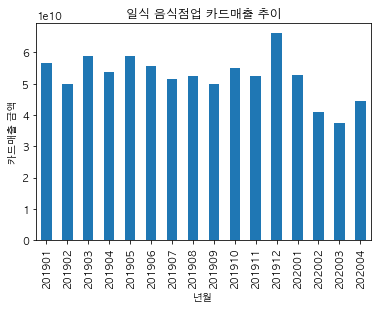

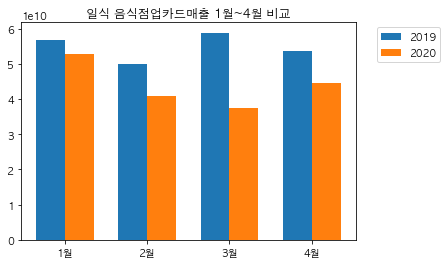

2019년 1월~4월과 2020년 1월~4월 카드매출 t-statistics 값은 2.874 이며, p-value는 0.028 입니다.
2019년 2월~4월과 2020년 2월~4월 카드매출 t-statistics 값은 4.067 이며, p-value는 0.015 입니다.
2019년 2월~4월에 비해 2020년 2월~4월 카드매출은 24.42%가 하락하였습니다.


In [65]:
# 업종별 데이터 추출

businessTypeAMT = businessAMT['일식 음식점업']

# 카드매출 시각화

businessTypeAMT.plot.bar()
plt.xlabel('년월')
plt.ylabel('카드매출 금액')
plt.title('일식 음식점업 카드매출 추이')

# 코로나 전후 비교 (2019년 1월~4월, 2020년 1월~4월)

# 2019년 1월~4월, 2020년 1월~4월 이용금액 합 데이터 추출

businessTypeAMT2019 = businessTypeAMT.loc['201901': '201904']
businessTypeAMT2020 = businessTypeAMT.loc['202001': '202004']

# 2019년 2월~4월, 2020년 2월~4월 이용건수 합 데이터 추출

businessTypeAMT2019_2 = businessTypeAMT.loc['201902': '201904']
businessTypeAMT2020_2 = businessTypeAMT.loc['202002': '202004']

# 2019년 1월~4월, 2020년 1월~4월 이용금액 비교 시각화

fig, ax = plt.subplots()

N = 4
ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, businessTypeAMT2019, width)

p2 = ax.bar(ind + width, businessTypeAMT2020, width)

ax.set_title('일식 음식점업카드매출 1월~4월 비교')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('1월', '2월', '3월', '4월'))

ax.legend((p1[0], p2[0]), ('2019', '2020'), bbox_to_anchor=(1.05, 1))

plt.show()

# 이용금액 Sample T-test 실행

# 2019년 1월~4월, 2020년 1월~4월 이용금액 T-test
businessAMTttest = stats.ttest_ind(businessTypeAMT2019.values, businessTypeAMT2020.values)

print("2019년 1월~4월과 2020년 1월~4월 카드매출 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %businessAMTttest)

# 2019년 2월~4월, 2020년 2월~4월 이용금액 T-test
businessAMTttest_2 = stats.ttest_ind(businessTypeAMT2019_2.values, businessTypeAMT2020_2.values)

print("2019년 2월~4월과 2020년 2월~4월 카드매출 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %businessAMTttest_2)

# 매출 하락 %

AMT2019sum = sum(businessTypeAMT2019_2.values)
AMT2020sum = sum(businessTypeAMT2020_2.values)

AMTpercentage = (AMT2019sum - AMT2020sum) / AMT2019sum * 100
print("2019년 2월~4월에 비해 2020년 2월~4월 카드매출은 %.2f%%가 하락하였습니다." %AMTpercentage)


## 자동차 임대업

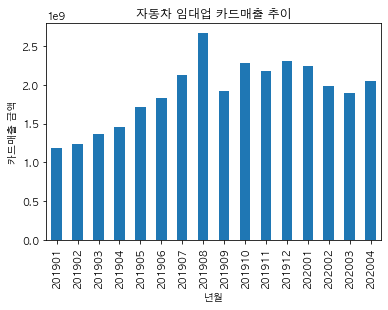

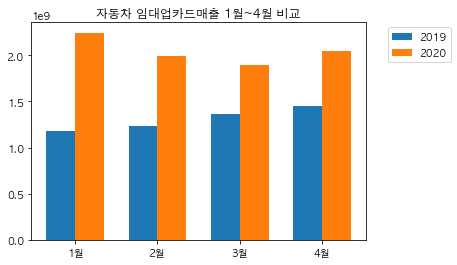

2019년 1월~4월과 2020년 1월~4월 카드매출 t-statistics 값은 -7.651 이며, p-value는 0.000 입니다.
2019년 2월~4월과 2020년 2월~4월 카드매출 t-statistics 값은 -8.064 이며, p-value는 0.001 입니다.
2019년 2월~4월에 비해 2020년 2월~4월 카드매출은 -46.28%가 하락하였습니다.


In [66]:
# 업종별 데이터 추출

businessTypeAMT = businessAMT['자동차 임대업']

# 카드매출 시각화

businessTypeAMT.plot.bar()
plt.xlabel('년월')
plt.ylabel('카드매출 금액')
plt.title('자동차 임대업 카드매출 추이')

# 코로나 전후 비교 (2019년 1월~4월, 2020년 1월~4월)

# 2019년 1월~4월, 2020년 1월~4월 이용금액 합 데이터 추출

businessTypeAMT2019 = businessTypeAMT.loc['201901': '201904']
businessTypeAMT2020 = businessTypeAMT.loc['202001': '202004']

# 2019년 2월~4월, 2020년 2월~4월 이용건수 합 데이터 추출

businessTypeAMT2019_2 = businessTypeAMT.loc['201902': '201904']
businessTypeAMT2020_2 = businessTypeAMT.loc['202002': '202004']

# 2019년 1월~4월, 2020년 1월~4월 이용금액 비교 시각화

fig, ax = plt.subplots()

N = 4
ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, businessTypeAMT2019, width)

p2 = ax.bar(ind + width, businessTypeAMT2020, width)

ax.set_title('자동차 임대업카드매출 1월~4월 비교')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('1월', '2월', '3월', '4월'))

ax.legend((p1[0], p2[0]), ('2019', '2020'), bbox_to_anchor=(1.05, 1))

plt.show()

# 이용금액 Sample T-test 실행

# 2019년 1월~4월, 2020년 1월~4월 이용금액 T-test
businessAMTttest = stats.ttest_ind(businessTypeAMT2019.values, businessTypeAMT2020.values)

print("2019년 1월~4월과 2020년 1월~4월 카드매출 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %businessAMTttest)

# 2019년 2월~4월, 2020년 2월~4월 이용금액 T-test
businessAMTttest_2 = stats.ttest_ind(businessTypeAMT2019_2.values, businessTypeAMT2020_2.values)

print("2019년 2월~4월과 2020년 2월~4월 카드매출 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %businessAMTttest_2)

# 매출 하락 %

AMT2019sum = sum(businessTypeAMT2019_2.values)
AMT2020sum = sum(businessTypeAMT2020_2.values)

AMTpercentage = (AMT2019sum - AMT2020sum) / AMT2019sum * 100
print("2019년 2월~4월에 비해 2020년 2월~4월 카드매출은 %.2f%%가 하락하였습니다." %AMTpercentage)


## 전시 및 행사 대행업

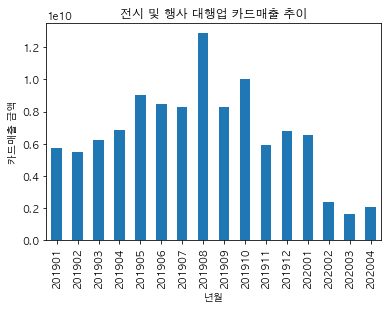

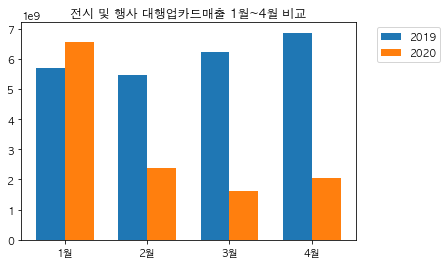

2019년 1월~4월과 2020년 1월~4월 카드매출 t-statistics 값은 2.453 이며, p-value는 0.050 입니다.
2019년 2월~4월과 2020년 2월~4월 카드매출 t-statistics 값은 9.161 이며, p-value는 0.001 입니다.
2019년 2월~4월에 비해 2020년 2월~4월 카드매출은 67.54%가 하락하였습니다.


In [67]:
# 업종별 데이터 추출

businessTypeAMT = businessAMT['전시 및 행사 대행업']

# 카드매출 시각화

businessTypeAMT.plot.bar()
plt.xlabel('년월')
plt.ylabel('카드매출 금액')
plt.title('전시 및 행사 대행업 카드매출 추이')

# 코로나 전후 비교 (2019년 1월~4월, 2020년 1월~4월)

# 2019년 1월~4월, 2020년 1월~4월 이용금액 합 데이터 추출

businessTypeAMT2019 = businessTypeAMT.loc['201901': '201904']
businessTypeAMT2020 = businessTypeAMT.loc['202001': '202004']

# 2019년 2월~4월, 2020년 2월~4월 이용건수 합 데이터 추출

businessTypeAMT2019_2 = businessTypeAMT.loc['201902': '201904']
businessTypeAMT2020_2 = businessTypeAMT.loc['202002': '202004']

# 2019년 1월~4월, 2020년 1월~4월 이용금액 비교 시각화

fig, ax = plt.subplots()

N = 4
ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, businessTypeAMT2019, width)

p2 = ax.bar(ind + width, businessTypeAMT2020, width)

ax.set_title('전시 및 행사 대행업카드매출 1월~4월 비교')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('1월', '2월', '3월', '4월'))

ax.legend((p1[0], p2[0]), ('2019', '2020'), bbox_to_anchor=(1.05, 1))

plt.show()

# 이용금액 Sample T-test 실행

# 2019년 1월~4월, 2020년 1월~4월 이용금액 T-test
businessAMTttest = stats.ttest_ind(businessTypeAMT2019.values, businessTypeAMT2020.values)

print("2019년 1월~4월과 2020년 1월~4월 카드매출 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %businessAMTttest)

# 2019년 2월~4월, 2020년 2월~4월 이용금액 T-test
businessAMTttest_2 = stats.ttest_ind(businessTypeAMT2019_2.values, businessTypeAMT2020_2.values)

print("2019년 2월~4월과 2020년 2월~4월 카드매출 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %businessAMTttest_2)

# 매출 하락 %

AMT2019sum = sum(businessTypeAMT2019_2.values)
AMT2020sum = sum(businessTypeAMT2020_2.values)

AMTpercentage = (AMT2019sum - AMT2020sum) / AMT2019sum * 100
print("2019년 2월~4월에 비해 2020년 2월~4월 카드매출은 %.2f%%가 하락하였습니다." %AMTpercentage)


## 정기 항공 운송업

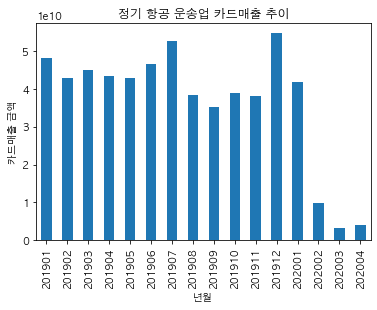

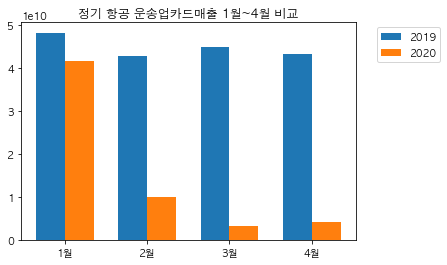

2019년 1월~4월과 2020년 1월~4월 카드매출 t-statistics 값은 3.275 이며, p-value는 0.017 입니다.
2019년 2월~4월과 2020년 2월~4월 카드매출 t-statistics 값은 17.445 이며, p-value는 0.000 입니다.
2019년 2월~4월에 비해 2020년 2월~4월 카드매출은 86.76%가 하락하였습니다.


In [68]:
# 업종별 데이터 추출

businessTypeAMT = businessAMT['정기 항공 운송업']

# 카드매출 시각화

businessTypeAMT.plot.bar()
plt.xlabel('년월')
plt.ylabel('카드매출 금액')
plt.title('정기 항공 운송업 카드매출 추이')

# 코로나 전후 비교 (2019년 1월~4월, 2020년 1월~4월)

# 2019년 1월~4월, 2020년 1월~4월 이용금액 합 데이터 추출

businessTypeAMT2019 = businessTypeAMT.loc['201901': '201904']
businessTypeAMT2020 = businessTypeAMT.loc['202001': '202004']

# 2019년 2월~4월, 2020년 2월~4월 이용건수 합 데이터 추출

businessTypeAMT2019_2 = businessTypeAMT.loc['201902': '201904']
businessTypeAMT2020_2 = businessTypeAMT.loc['202002': '202004']

# 2019년 1월~4월, 2020년 1월~4월 이용금액 비교 시각화

fig, ax = plt.subplots()

N = 4
ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, businessTypeAMT2019, width)

p2 = ax.bar(ind + width, businessTypeAMT2020, width)

ax.set_title('정기 항공 운송업카드매출 1월~4월 비교')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('1월', '2월', '3월', '4월'))

ax.legend((p1[0], p2[0]), ('2019', '2020'), bbox_to_anchor=(1.05, 1))

plt.show()

# 이용금액 Sample T-test 실행

# 2019년 1월~4월, 2020년 1월~4월 이용금액 T-test
businessAMTttest = stats.ttest_ind(businessTypeAMT2019.values, businessTypeAMT2020.values)

print("2019년 1월~4월과 2020년 1월~4월 카드매출 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %businessAMTttest)

# 2019년 2월~4월, 2020년 2월~4월 이용금액 T-test
businessAMTttest_2 = stats.ttest_ind(businessTypeAMT2019_2.values, businessTypeAMT2020_2.values)

print("2019년 2월~4월과 2020년 2월~4월 카드매출 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %businessAMTttest_2)

# 매출 하락 %

AMT2019sum = sum(businessTypeAMT2019_2.values)
AMT2020sum = sum(businessTypeAMT2020_2.values)

AMTpercentage = (AMT2019sum - AMT2020sum) / AMT2019sum * 100
print("2019년 2월~4월에 비해 2020년 2월~4월 카드매출은 %.2f%%가 하락하였습니다." %AMTpercentage)


## 중식 음식점업

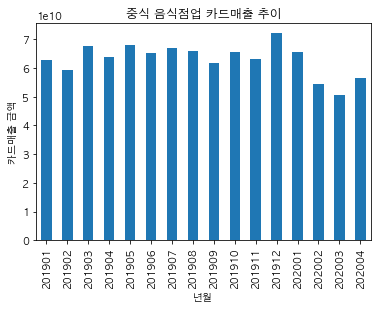

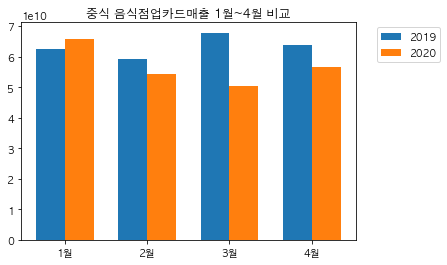

2019년 1월~4월과 2020년 1월~4월 카드매출 t-statistics 값은 1.787 이며, p-value는 0.124 입니다.
2019년 2월~4월과 2020년 2월~4월 카드매출 t-statistics 값은 3.186 이며, p-value는 0.033 입니다.
2019년 2월~4월에 비해 2020년 2월~4월 카드매출은 15.38%가 하락하였습니다.


In [69]:
# 업종별 데이터 추출

businessTypeAMT = businessAMT['중식 음식점업']

# 카드매출 시각화

businessTypeAMT.plot.bar()
plt.xlabel('년월')
plt.ylabel('카드매출 금액')
plt.title('중식 음식점업 카드매출 추이')

# 코로나 전후 비교 (2019년 1월~4월, 2020년 1월~4월)

# 2019년 1월~4월, 2020년 1월~4월 이용금액 합 데이터 추출

businessTypeAMT2019 = businessTypeAMT.loc['201901': '201904']
businessTypeAMT2020 = businessTypeAMT.loc['202001': '202004']

# 2019년 2월~4월, 2020년 2월~4월 이용건수 합 데이터 추출

businessTypeAMT2019_2 = businessTypeAMT.loc['201902': '201904']
businessTypeAMT2020_2 = businessTypeAMT.loc['202002': '202004']

# 2019년 1월~4월, 2020년 1월~4월 이용금액 비교 시각화

fig, ax = plt.subplots()

N = 4
ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, businessTypeAMT2019, width)

p2 = ax.bar(ind + width, businessTypeAMT2020, width)

ax.set_title('중식 음식점업카드매출 1월~4월 비교')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('1월', '2월', '3월', '4월'))

ax.legend((p1[0], p2[0]), ('2019', '2020'), bbox_to_anchor=(1.05, 1))

plt.show()

# 이용금액 Sample T-test 실행

# 2019년 1월~4월, 2020년 1월~4월 이용금액 T-test
businessAMTttest = stats.ttest_ind(businessTypeAMT2019.values, businessTypeAMT2020.values)

print("2019년 1월~4월과 2020년 1월~4월 카드매출 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %businessAMTttest)

# 2019년 2월~4월, 2020년 2월~4월 이용금액 T-test
businessAMTttest_2 = stats.ttest_ind(businessTypeAMT2019_2.values, businessTypeAMT2020_2.values)

print("2019년 2월~4월과 2020년 2월~4월 카드매출 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %businessAMTttest_2)

# 매출 하락 %

AMT2019sum = sum(businessTypeAMT2019_2.values)
AMT2020sum = sum(businessTypeAMT2020_2.values)

AMTpercentage = (AMT2019sum - AMT2020sum) / AMT2019sum * 100
print("2019년 2월~4월에 비해 2020년 2월~4월 카드매출은 %.2f%%가 하락하였습니다." %AMTpercentage)


## 차량용 가스 충전업

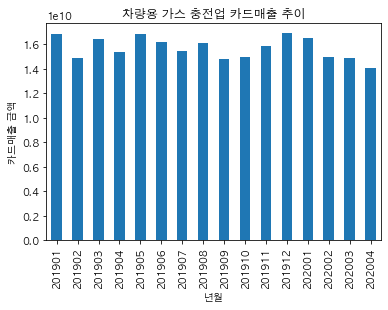

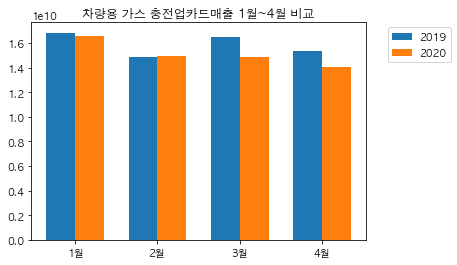

2019년 1월~4월과 2020년 1월~4월 카드매출 t-statistics 값은 1.120 이며, p-value는 0.306 입니다.
2019년 2월~4월과 2020년 2월~4월 카드매출 t-statistics 값은 1.714 이며, p-value는 0.162 입니다.
2019년 2월~4월에 비해 2020년 2월~4월 카드매출은 6.06%가 하락하였습니다.


In [70]:
# 업종별 데이터 추출

businessTypeAMT = businessAMT['차량용 가스 충전업']

# 카드매출 시각화

businessTypeAMT.plot.bar()
plt.xlabel('년월')
plt.ylabel('카드매출 금액')
plt.title('차량용 가스 충전업 카드매출 추이')

# 코로나 전후 비교 (2019년 1월~4월, 2020년 1월~4월)

# 2019년 1월~4월, 2020년 1월~4월 이용금액 합 데이터 추출

businessTypeAMT2019 = businessTypeAMT.loc['201901': '201904']
businessTypeAMT2020 = businessTypeAMT.loc['202001': '202004']

# 2019년 2월~4월, 2020년 2월~4월 이용건수 합 데이터 추출

businessTypeAMT2019_2 = businessTypeAMT.loc['201902': '201904']
businessTypeAMT2020_2 = businessTypeAMT.loc['202002': '202004']

# 2019년 1월~4월, 2020년 1월~4월 이용금액 비교 시각화

fig, ax = plt.subplots()

N = 4
ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, businessTypeAMT2019, width)

p2 = ax.bar(ind + width, businessTypeAMT2020, width)

ax.set_title('차량용 가스 충전업카드매출 1월~4월 비교')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('1월', '2월', '3월', '4월'))

ax.legend((p1[0], p2[0]), ('2019', '2020'), bbox_to_anchor=(1.05, 1))

plt.show()

# 이용금액 Sample T-test 실행

# 2019년 1월~4월, 2020년 1월~4월 이용금액 T-test
businessAMTttest = stats.ttest_ind(businessTypeAMT2019.values, businessTypeAMT2020.values)

print("2019년 1월~4월과 2020년 1월~4월 카드매출 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %businessAMTttest)

# 2019년 2월~4월, 2020년 2월~4월 이용금액 T-test
businessAMTttest_2 = stats.ttest_ind(businessTypeAMT2019_2.values, businessTypeAMT2020_2.values)

print("2019년 2월~4월과 2020년 2월~4월 카드매출 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %businessAMTttest_2)

# 매출 하락 %

AMT2019sum = sum(businessTypeAMT2019_2.values)
AMT2020sum = sum(businessTypeAMT2020_2.values)

AMTpercentage = (AMT2019sum - AMT2020sum) / AMT2019sum * 100
print("2019년 2월~4월에 비해 2020년 2월~4월 카드매출은 %.2f%%가 하락하였습니다." %AMTpercentage)


## 차량용 주유소 운영업

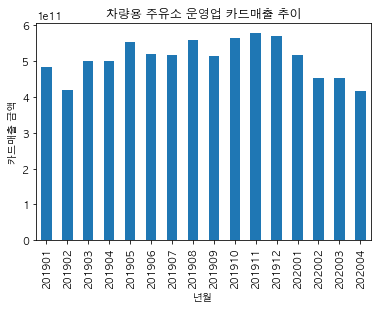

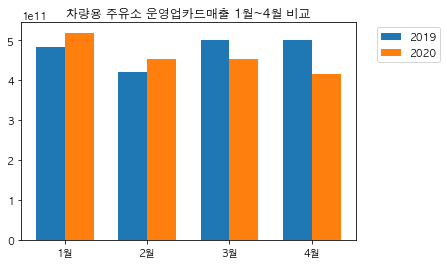

2019년 1월~4월과 2020년 1월~4월 카드매출 t-statistics 값은 0.550 이며, p-value는 0.602 입니다.
2019년 2월~4월과 2020년 2월~4월 카드매출 t-statistics 값은 1.117 이며, p-value는 0.327 입니다.
2019년 2월~4월에 비해 2020년 2월~4월 카드매출은 6.92%가 하락하였습니다.


In [71]:
# 업종별 데이터 추출

businessTypeAMT = businessAMT['차량용 주유소 운영업']

# 카드매출 시각화

businessTypeAMT.plot.bar()
plt.xlabel('년월')
plt.ylabel('카드매출 금액')
plt.title('차량용 주유소 운영업 카드매출 추이')

# 코로나 전후 비교 (2019년 1월~4월, 2020년 1월~4월)

# 2019년 1월~4월, 2020년 1월~4월 이용금액 합 데이터 추출

businessTypeAMT2019 = businessTypeAMT.loc['201901': '201904']
businessTypeAMT2020 = businessTypeAMT.loc['202001': '202004']

# 2019년 2월~4월, 2020년 2월~4월 이용건수 합 데이터 추출

businessTypeAMT2019_2 = businessTypeAMT.loc['201902': '201904']
businessTypeAMT2020_2 = businessTypeAMT.loc['202002': '202004']

# 2019년 1월~4월, 2020년 1월~4월 이용금액 비교 시각화

fig, ax = plt.subplots()

N = 4
ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, businessTypeAMT2019, width)

p2 = ax.bar(ind + width, businessTypeAMT2020, width)

ax.set_title('차량용 주유소 운영업카드매출 1월~4월 비교')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('1월', '2월', '3월', '4월'))

ax.legend((p1[0], p2[0]), ('2019', '2020'), bbox_to_anchor=(1.05, 1))

plt.show()

# 이용금액 Sample T-test 실행

# 2019년 1월~4월, 2020년 1월~4월 이용금액 T-test
businessAMTttest = stats.ttest_ind(businessTypeAMT2019.values, businessTypeAMT2020.values)

print("2019년 1월~4월과 2020년 1월~4월 카드매출 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %businessAMTttest)

# 2019년 2월~4월, 2020년 2월~4월 이용금액 T-test
businessAMTttest_2 = stats.ttest_ind(businessTypeAMT2019_2.values, businessTypeAMT2020_2.values)

print("2019년 2월~4월과 2020년 2월~4월 카드매출 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %businessAMTttest_2)

# 매출 하락 %

AMT2019sum = sum(businessTypeAMT2019_2.values)
AMT2020sum = sum(businessTypeAMT2020_2.values)

AMTpercentage = (AMT2019sum - AMT2020sum) / AMT2019sum * 100
print("2019년 2월~4월에 비해 2020년 2월~4월 카드매출은 %.2f%%가 하락하였습니다." %AMTpercentage)


## 체인화 편의점

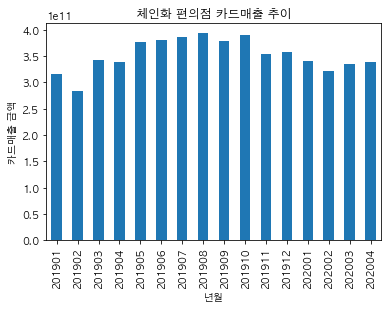

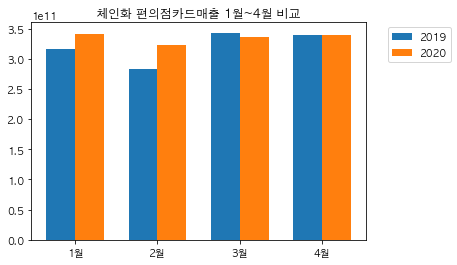

2019년 1월~4월과 2020년 1월~4월 카드매출 t-statistics 값은 -0.992 이며, p-value는 0.360 입니다.
2019년 2월~4월과 2020년 2월~4월 카드매출 t-statistics 값은 -0.528 이며, p-value는 0.625 입니다.
2019년 2월~4월에 비해 2020년 2월~4월 카드매출은 -3.28%가 하락하였습니다.


In [72]:
# 업종별 데이터 추출

businessTypeAMT = businessAMT['체인화 편의점']

# 카드매출 시각화

businessTypeAMT.plot.bar()
plt.xlabel('년월')
plt.ylabel('카드매출 금액')
plt.title('체인화 편의점 카드매출 추이')

# 코로나 전후 비교 (2019년 1월~4월, 2020년 1월~4월)

# 2019년 1월~4월, 2020년 1월~4월 이용금액 합 데이터 추출

businessTypeAMT2019 = businessTypeAMT.loc['201901': '201904']
businessTypeAMT2020 = businessTypeAMT.loc['202001': '202004']

# 2019년 2월~4월, 2020년 2월~4월 이용건수 합 데이터 추출

businessTypeAMT2019_2 = businessTypeAMT.loc['201902': '201904']
businessTypeAMT2020_2 = businessTypeAMT.loc['202002': '202004']

# 2019년 1월~4월, 2020년 1월~4월 이용금액 비교 시각화

fig, ax = plt.subplots()

N = 4
ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, businessTypeAMT2019, width)

p2 = ax.bar(ind + width, businessTypeAMT2020, width)

ax.set_title('체인화 편의점카드매출 1월~4월 비교')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('1월', '2월', '3월', '4월'))

ax.legend((p1[0], p2[0]), ('2019', '2020'), bbox_to_anchor=(1.05, 1))

plt.show()

# 이용금액 Sample T-test 실행

# 2019년 1월~4월, 2020년 1월~4월 이용금액 T-test
businessAMTttest = stats.ttest_ind(businessTypeAMT2019.values, businessTypeAMT2020.values)

print("2019년 1월~4월과 2020년 1월~4월 카드매출 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %businessAMTttest)

# 2019년 2월~4월, 2020년 2월~4월 이용금액 T-test
businessAMTttest_2 = stats.ttest_ind(businessTypeAMT2019_2.values, businessTypeAMT2020_2.values)

print("2019년 2월~4월과 2020년 2월~4월 카드매출 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %businessAMTttest_2)

# 매출 하락 %

AMT2019sum = sum(businessTypeAMT2019_2.values)
AMT2020sum = sum(businessTypeAMT2020_2.values)

AMTpercentage = (AMT2019sum - AMT2020sum) / AMT2019sum * 100
print("2019년 2월~4월에 비해 2020년 2월~4월 카드매출은 %.2f%%가 하락하였습니다." %AMTpercentage)


## 택시 운송업

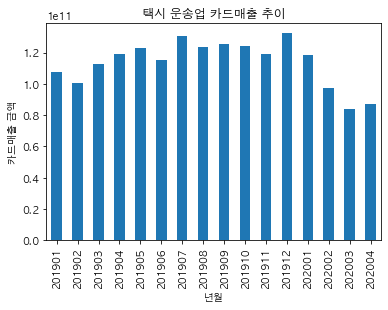

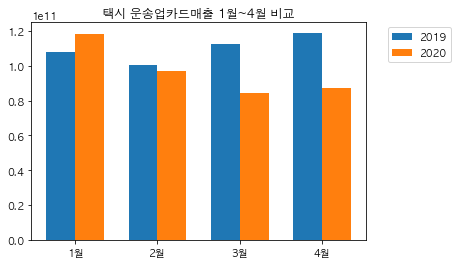

2019년 1월~4월과 2020년 1월~4월 카드매출 t-statistics 값은 1.518 이며, p-value는 0.180 입니다.
2019년 2월~4월과 2020년 2월~4월 카드매출 t-statistics 값은 3.112 이며, p-value는 0.036 입니다.
2019년 2월~4월에 비해 2020년 2월~4월 카드매출은 19.04%가 하락하였습니다.


In [73]:
# 업종별 데이터 추출

businessTypeAMT = businessAMT['택시 운송업']

# 카드매출 시각화

businessTypeAMT.plot.bar()
plt.xlabel('년월')
plt.ylabel('카드매출 금액')
plt.title('택시 운송업 카드매출 추이')

# 코로나 전후 비교 (2019년 1월~4월, 2020년 1월~4월)

# 2019년 1월~4월, 2020년 1월~4월 이용금액 합 데이터 추출

businessTypeAMT2019 = businessTypeAMT.loc['201901': '201904']
businessTypeAMT2020 = businessTypeAMT.loc['202001': '202004']

# 2019년 2월~4월, 2020년 2월~4월 이용건수 합 데이터 추출

businessTypeAMT2019_2 = businessTypeAMT.loc['201902': '201904']
businessTypeAMT2020_2 = businessTypeAMT.loc['202002': '202004']

# 2019년 1월~4월, 2020년 1월~4월 이용금액 비교 시각화

fig, ax = plt.subplots()

N = 4
ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, businessTypeAMT2019, width)

p2 = ax.bar(ind + width, businessTypeAMT2020, width)

ax.set_title('택시 운송업카드매출 1월~4월 비교')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('1월', '2월', '3월', '4월'))

ax.legend((p1[0], p2[0]), ('2019', '2020'), bbox_to_anchor=(1.05, 1))

plt.show()

# 이용금액 Sample T-test 실행

# 2019년 1월~4월, 2020년 1월~4월 이용금액 T-test
businessAMTttest = stats.ttest_ind(businessTypeAMT2019.values, businessTypeAMT2020.values)

print("2019년 1월~4월과 2020년 1월~4월 카드매출 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %businessAMTttest)

# 2019년 2월~4월, 2020년 2월~4월 이용금액 T-test
businessAMTttest_2 = stats.ttest_ind(businessTypeAMT2019_2.values, businessTypeAMT2020_2.values)

print("2019년 2월~4월과 2020년 2월~4월 카드매출 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %businessAMTttest_2)

# 매출 하락 %

AMT2019sum = sum(businessTypeAMT2019_2.values)
AMT2020sum = sum(businessTypeAMT2020_2.values)

AMTpercentage = (AMT2019sum - AMT2020sum) / AMT2019sum * 100
print("2019년 2월~4월에 비해 2020년 2월~4월 카드매출은 %.2f%%가 하락하였습니다." %AMTpercentage)


## 피자 햄버거 샌드위치 및 유사 음식점업

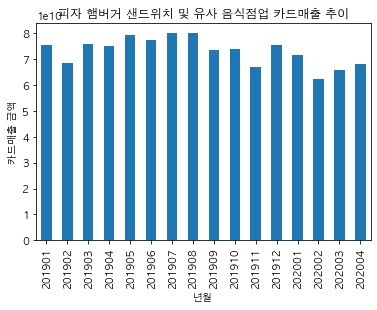

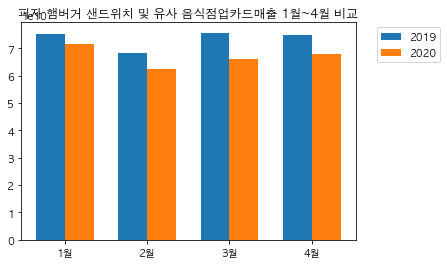

2019년 1월~4월과 2020년 1월~4월 카드매출 t-statistics 값은 2.525 이며, p-value는 0.045 입니다.
2019년 2월~4월과 2020년 2월~4월 카드매출 t-statistics 값은 2.671 이며, p-value는 0.056 입니다.
2019년 2월~4월에 비해 2020년 2월~4월 카드매출은 10.44%가 하락하였습니다.


In [74]:
# 업종별 데이터 추출

businessTypeAMT = businessAMT['피자 햄버거 샌드위치 및 유사 음식점업']

# 카드매출 시각화

businessTypeAMT.plot.bar()
plt.xlabel('년월')
plt.ylabel('카드매출 금액')
plt.title('피자 햄버거 샌드위치 및 유사 음식점업 카드매출 추이')

# 코로나 전후 비교 (2019년 1월~4월, 2020년 1월~4월)

# 2019년 1월~4월, 2020년 1월~4월 이용금액 합 데이터 추출

businessTypeAMT2019 = businessTypeAMT.loc['201901': '201904']
businessTypeAMT2020 = businessTypeAMT.loc['202001': '202004']

# 2019년 2월~4월, 2020년 2월~4월 이용건수 합 데이터 추출

businessTypeAMT2019_2 = businessTypeAMT.loc['201902': '201904']
businessTypeAMT2020_2 = businessTypeAMT.loc['202002': '202004']

# 2019년 1월~4월, 2020년 1월~4월 이용금액 비교 시각화

fig, ax = plt.subplots()

N = 4
ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, businessTypeAMT2019, width)

p2 = ax.bar(ind + width, businessTypeAMT2020, width)

ax.set_title('피자 햄버거 샌드위치 및 유사 음식점업카드매출 1월~4월 비교')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('1월', '2월', '3월', '4월'))

ax.legend((p1[0], p2[0]), ('2019', '2020'), bbox_to_anchor=(1.05, 1))

plt.show()

# 이용금액 Sample T-test 실행

# 2019년 1월~4월, 2020년 1월~4월 이용금액 T-test
businessAMTttest = stats.ttest_ind(businessTypeAMT2019.values, businessTypeAMT2020.values)

print("2019년 1월~4월과 2020년 1월~4월 카드매출 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %businessAMTttest)

# 2019년 2월~4월, 2020년 2월~4월 이용금액 T-test
businessAMTttest_2 = stats.ttest_ind(businessTypeAMT2019_2.values, businessTypeAMT2020_2.values)

print("2019년 2월~4월과 2020년 2월~4월 카드매출 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %businessAMTttest_2)

# 매출 하락 %

AMT2019sum = sum(businessTypeAMT2019_2.values)
AMT2020sum = sum(businessTypeAMT2020_2.values)

AMTpercentage = (AMT2019sum - AMT2020sum) / AMT2019sum * 100
print("2019년 2월~4월에 비해 2020년 2월~4월 카드매출은 %.2f%%가 하락하였습니다." %AMTpercentage)


## 한식 음식점업

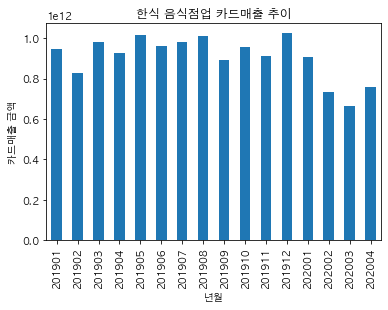

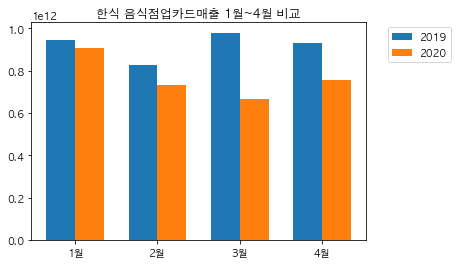

2019년 1월~4월과 2020년 1월~4월 카드매출 t-statistics 값은 2.555 이며, p-value는 0.043 입니다.
2019년 2월~4월과 2020년 2월~4월 카드매출 t-statistics 값은 3.711 이며, p-value는 0.021 입니다.
2019년 2월~4월에 비해 2020년 2월~4월 카드매출은 21.21%가 하락하였습니다.


In [75]:
# 업종별 데이터 추출

businessTypeAMT = businessAMT['한식 음식점업']

# 카드매출 시각화

businessTypeAMT.plot.bar()
plt.xlabel('년월')
plt.ylabel('카드매출 금액')
plt.title('한식 음식점업 카드매출 추이')

# 코로나 전후 비교 (2019년 1월~4월, 2020년 1월~4월)

# 2019년 1월~4월, 2020년 1월~4월 이용금액 합 데이터 추출

businessTypeAMT2019 = businessTypeAMT.loc['201901': '201904']
businessTypeAMT2020 = businessTypeAMT.loc['202001': '202004']

# 2019년 2월~4월, 2020년 2월~4월 이용건수 합 데이터 추출

businessTypeAMT2019_2 = businessTypeAMT.loc['201902': '201904']
businessTypeAMT2020_2 = businessTypeAMT.loc['202002': '202004']

# 2019년 1월~4월, 2020년 1월~4월 이용금액 비교 시각화

fig, ax = plt.subplots()

N = 4
ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, businessTypeAMT2019, width)

p2 = ax.bar(ind + width, businessTypeAMT2020, width)

ax.set_title('한식 음식점업카드매출 1월~4월 비교')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('1월', '2월', '3월', '4월'))

ax.legend((p1[0], p2[0]), ('2019', '2020'), bbox_to_anchor=(1.05, 1))

plt.show()

# 이용금액 Sample T-test 실행

# 2019년 1월~4월, 2020년 1월~4월 이용금액 T-test
businessAMTttest = stats.ttest_ind(businessTypeAMT2019.values, businessTypeAMT2020.values)

print("2019년 1월~4월과 2020년 1월~4월 카드매출 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %businessAMTttest)

# 2019년 2월~4월, 2020년 2월~4월 이용금액 T-test
businessAMTttest_2 = stats.ttest_ind(businessTypeAMT2019_2.values, businessTypeAMT2020_2.values)

print("2019년 2월~4월과 2020년 2월~4월 카드매출 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %businessAMTttest_2)

# 매출 하락 %

AMT2019sum = sum(businessTypeAMT2019_2.values)
AMT2020sum = sum(businessTypeAMT2020_2.values)

AMTpercentage = (AMT2019sum - AMT2020sum) / AMT2019sum * 100
print("2019년 2월~4월에 비해 2020년 2월~4월 카드매출은 %.2f%%가 하락하였습니다." %AMTpercentage)


## 호텔업

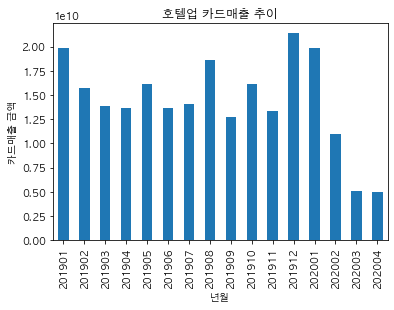

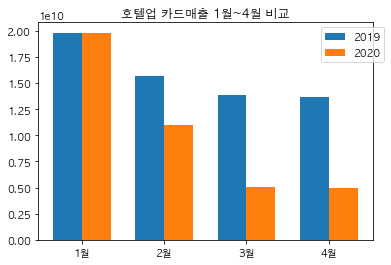

2019년 1월~4월과 2020년 1월~4월 카드매출 t-statistics 값은 1.458 이며, p-value는 0.195 입니다.
2019년 2월~4월과 2020년 2월~4월 카드매출 t-statistics 값은 3.503 이며, p-value는 0.025 입니다.
2019년 2월~4월에 비해 2020년 2월~4월 카드매출은 51.13%가 하락하였습니다.


In [76]:
# 업종별 데이터 추출

businessTypeAMT = businessAMT['호텔업']

# 카드매출 시각화

businessTypeAMT.plot.bar()
plt.xlabel('년월')
plt.ylabel('카드매출 금액')
plt.title('호텔업 카드매출 추이')

# 코로나 전후 비교 (2019년 1월~4월, 2020년 1월~4월)

# 2019년 1월~4월, 2020년 1월~4월 이용금액 합 데이터 추출

businessTypeAMT2019 = businessTypeAMT.loc['201901': '201904']
businessTypeAMT2020 = businessTypeAMT.loc['202001': '202004']

# 2019년 2월~4월, 2020년 2월~4월 이용건수 합 데이터 추출

businessTypeAMT2019_2 = businessTypeAMT.loc['201902': '201904']
businessTypeAMT2020_2 = businessTypeAMT.loc['202002': '202004']

# 2019년 1월~4월, 2020년 1월~4월 이용금액 비교 시각화

fig, ax = plt.subplots()

N = 4
ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, businessTypeAMT2019, width)

p2 = ax.bar(ind + width, businessTypeAMT2020, width)

ax.set_title('호텔업 카드매출 1월~4월 비교')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('1월', '2월', '3월', '4월'))

ax.legend((p1[0], p2[0]), ('2019', '2020'), bbox_to_anchor=(1.05, 1))

plt.show()

# 이용금액 Sample T-test 실행

# 2019년 1월~4월, 2020년 1월~4월 이용금액 T-test
businessAMTttest = stats.ttest_ind(businessTypeAMT2019.values, businessTypeAMT2020.values)

print("2019년 1월~4월과 2020년 1월~4월 카드매출 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %businessAMTttest)

# 2019년 2월~4월, 2020년 2월~4월 이용금액 T-test
businessAMTttest_2 = stats.ttest_ind(businessTypeAMT2019_2.values, businessTypeAMT2020_2.values)

print("2019년 2월~4월과 2020년 2월~4월 카드매출 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %businessAMTttest_2)

# 매출 하락 %

AMT2019sum = sum(businessTypeAMT2019_2.values)
AMT2020sum = sum(businessTypeAMT2020_2.values)

AMTpercentage = (AMT2019sum - AMT2020sum) / AMT2019sum * 100
print("2019년 2월~4월에 비해 2020년 2월~4월 카드매출은 %.2f%%가 하락하였습니다." %AMTpercentage)


## 화장품 및 방향제 소매업

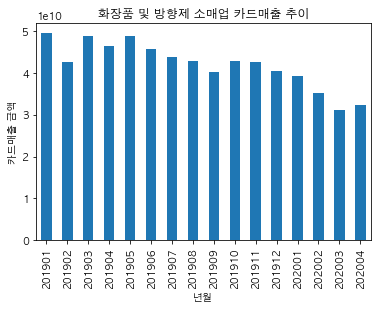

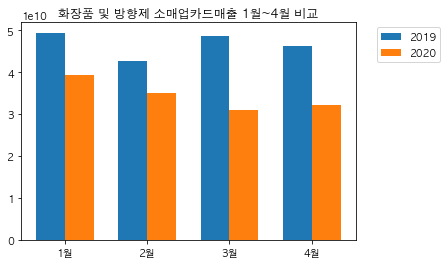

2019년 1월~4월과 2020년 1월~4월 카드매출 t-statistics 값은 5.167 이며, p-value는 0.002 입니다.
2019년 2월~4월과 2020년 2월~4월 카드매출 t-statistics 값은 6.189 이며, p-value는 0.003 입니다.
2019년 2월~4월에 비해 2020년 2월~4월 카드매출은 28.61%가 하락하였습니다.


In [77]:
# 업종별 데이터 추출

businessTypeAMT = businessAMT['화장품 및 방향제 소매업']

# 카드매출 시각화

businessTypeAMT.plot.bar()
plt.xlabel('년월')
plt.ylabel('카드매출 금액')
plt.title('화장품 및 방향제 소매업 카드매출 추이')

# 코로나 전후 비교 (2019년 1월~4월, 2020년 1월~4월)

# 2019년 1월~4월, 2020년 1월~4월 이용금액 합 데이터 추출

businessTypeAMT2019 = businessTypeAMT.loc['201901': '201904']
businessTypeAMT2020 = businessTypeAMT.loc['202001': '202004']

# 2019년 2월~4월, 2020년 2월~4월 이용건수 합 데이터 추출

businessTypeAMT2019_2 = businessTypeAMT.loc['201902': '201904']
businessTypeAMT2020_2 = businessTypeAMT.loc['202002': '202004']

# 2019년 1월~4월, 2020년 1월~4월 이용금액 비교 시각화

fig, ax = plt.subplots()

N = 4
ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, businessTypeAMT2019, width)

p2 = ax.bar(ind + width, businessTypeAMT2020, width)

ax.set_title('화장품 및 방향제 소매업 카드매출 1월~4월 비교')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('1월', '2월', '3월', '4월'))

ax.legend((p1[0], p2[0]), ('2019', '2020'), bbox_to_anchor=(1.05, 1))

plt.show()

# 이용금액 Sample T-test 실행

# 2019년 1월~4월, 2020년 1월~4월 이용금액 T-test
businessAMTttest = stats.ttest_ind(businessTypeAMT2019.values, businessTypeAMT2020.values)

print("2019년 1월~4월과 2020년 1월~4월 카드매출 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %businessAMTttest)

# 2019년 2월~4월, 2020년 2월~4월 이용금액 T-test
businessAMTttest_2 = stats.ttest_ind(businessTypeAMT2019_2.values, businessTypeAMT2020_2.values)

print("2019년 2월~4월과 2020년 2월~4월 카드매출 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %businessAMTttest_2)

# 매출 하락 %

AMT2019sum = sum(businessTypeAMT2019_2.values)
AMT2020sum = sum(businessTypeAMT2020_2.values)

AMTpercentage = (AMT2019sum - AMT2020sum) / AMT2019sum * 100
print("2019년 2월~4월에 비해 2020년 2월~4월 카드매출은 %.2f%%가 하락하였습니다." %AMTpercentage)


## 휴양콘도 운영업

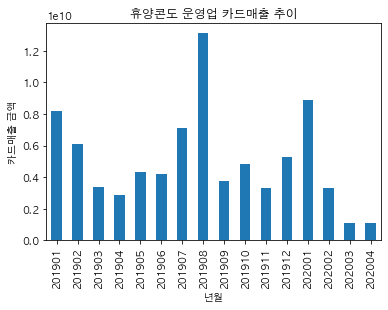

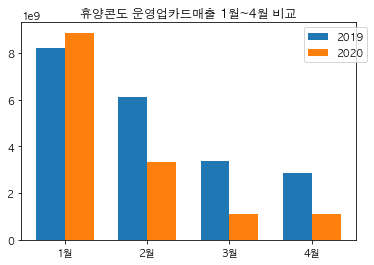

2019년 1월~4월과 2020년 1월~4월 카드매출 t-statistics 값은 0.694 이며, p-value는 0.514 입니다.
2019년 2월~4월과 2020년 2월~4월 카드매출 t-statistics 값은 1.818 이며, p-value는 0.143 입니다.
2019년 2월~4월에 비해 2020년 2월~4월 카드매출은 55.22%가 하락하였습니다.


In [78]:
# 업종별 데이터 추출

businessTypeAMT = businessAMT['휴양콘도 운영업']

# 카드매출 시각화

businessTypeAMT.plot.bar()
plt.xlabel('년월')
plt.ylabel('카드매출 금액')
plt.title('휴양콘도 운영업 카드매출 추이')

# 코로나 전후 비교 (2019년 1월~4월, 2020년 1월~4월)

# 2019년 1월~4월, 2020년 1월~4월 이용금액 합 데이터 추출

businessTypeAMT2019 = businessTypeAMT.loc['201901': '201904']
businessTypeAMT2020 = businessTypeAMT.loc['202001': '202004']

# 2019년 2월~4월, 2020년 2월~4월 이용건수 합 데이터 추출

businessTypeAMT2019_2 = businessTypeAMT.loc['201902': '201904']
businessTypeAMT2020_2 = businessTypeAMT.loc['202002': '202004']

# 2019년 1월~4월, 2020년 1월~4월 이용금액 비교 시각화

fig, ax = plt.subplots()

N = 4
ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, businessTypeAMT2019, width)

p2 = ax.bar(ind + width, businessTypeAMT2020, width)

ax.set_title('휴양콘도 운영업카드매출 1월~4월 비교')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('1월', '2월', '3월', '4월'))

ax.legend((p1[0], p2[0]), ('2019', '2020'), bbox_to_anchor=(1.05, 1))

plt.show()

# 이용금액 Sample T-test 실행

# 2019년 1월~4월, 2020년 1월~4월 이용금액 T-test
businessAMTttest = stats.ttest_ind(businessTypeAMT2019.values, businessTypeAMT2020.values)

print("2019년 1월~4월과 2020년 1월~4월 카드매출 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %businessAMTttest)

# 2019년 2월~4월, 2020년 2월~4월 이용금액 T-test
businessAMTttest_2 = stats.ttest_ind(businessTypeAMT2019_2.values, businessTypeAMT2020_2.values)

print("2019년 2월~4월과 2020년 2월~4월 카드매출 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %businessAMTttest_2)

# 매출 하락 %

AMT2019sum = sum(businessTypeAMT2019_2.values)
AMT2020sum = sum(businessTypeAMT2020_2.values)

AMTpercentage = (AMT2019sum - AMT2020sum) / AMT2019sum * 100
print("2019년 2월~4월에 비해 2020년 2월~4월 카드매출은 %.2f%%가 하락하였습니다." %AMTpercentage)
